# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install matplotlib==3.10.0

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('D://EDA_NYC_Taxi Datasets and Dictionary//trip_records//2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Importing os
import os 

# Select the folder having data files
os.chdir('D://EDA_NYC_Taxi Datasets and Dictionary//trip_records')

# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])
file_list

# Initialize final DataFrame to hold all sampled data
df = pd.DataFrame()

# Process each file
for file_name in file_list:
    try:
        print(f"Processing: {file_name}")
        file_path = os.path.join(os.getcwd(), file_name)

        # Read parquet file
        df_month = pd.read_parquet(file_path)

        # Convert datetime column to datetime object
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract date and hour
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

 # Store samples for this month
        sampled_data = pd.DataFrame()

# Iterate through each unique date
        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]

            for hour in range(24):
                df_hour = df_day[df_day['hour'] == hour]

 # Sample 1% of records from this hour (if not empty)
                if not df_hour.empty:
                    sample = df_hour.sample(frac=0.01, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
                    
# Append this month's sampled data to final DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Show final shape
print(f"\nTotal sampled rows: {df.shape[0]}")

Processing: 2023-1.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet
Processing: nyc_taxi_sampled.parquet

Total sampled rows: 383659


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
# df.to_parquet('')
# Save final DataFrame to CSV and/or Parquet
df.to_csv('nyc_taxi_sampled.csv', index=False)
df.to_parquet('nyc_taxi_sampled.parquet', index=False)

print("\n Sampled data saved successfully.")


 Sampled data saved successfully.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file
df = pd.read_csv("D://EDA_NYC_Taxi Datasets and Dictionary//trip_records//nyc_taxi_sampled.csv")
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...          ...                  ...                   ...              ...   
383654         1  2023-09-30 19:45:40   2023-09-30 19:52:16              1.0   
383655         2  2023-09-30 20:54:11   2023-09-30 21:30:45              2.0   
383656         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
383657         2  2023-09-30 22:59:38   2023-09-30 23:27:20              2.0   
383658         1  2023-09-30 23:40:49   2023-10-01 00:19:28              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N           138   
1                1.24         1.0                  N           161   
2                1.44         1.0                  N           237   
3                0.54         1.0                  N           143   
4               19.24         NaN                NaN            66   
...               ...         ...                ...           ...   
383654           0.90         1.0                  N           234   
383655          17.15         2.0                  N           132   
383656           0.00         NaN                NaN           249   
383657           5.25         1.0                  N            79   
383658          17.40         2.0                  N           132   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                256             2  ...      0.5        0.00          0.00   
1                237             1  ...      0.5        2.58          0.00   
2                141             2  ...      0.5        0.00          0.00   
3                142             2  ...      0.5        0.00          0.00   
4                107             0  ...      0.5        5.93          0.00   
...              ...           ...  ...      ...         ...           ...   
383654           113             1  ...      0.5        3.55          0.00   
383655           164             1  ...      0.5       20.23          6.94   
383656            87             0  ...      0.5        0.00          0.00   
383657           239             1  ...      0.5        6.00          0.00   
383658           107             1  ...      0.5       20.65          6.94   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
383654                    1.0         15.45                   2.5   
383655                    1.0        102.92                   2.5   
383656                    1.0         23.71                   NaN   
383657                    1.0         39.20                   2.5   
383658                    1.0        103.34                   2.5   

        airport_fee        date  hour Airport_fee  
0              1.25  2023-01-01     0         NaN  
1              0.00  2023-01-01     0         NaN  
2              0.00  2023-01-01     0         NaN  
3              0.00  2023-01-01     0         NaN  
4               NaN  2023-01-01     0         NaN  
...             ...         ...   ...         ...  
383654          NaN  2023-09-30    19        0.00  
383655          NaN  202

In [9]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [10]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383659 entries, 0 to 383658
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               383659 non-null  int64  
 1   tpep_pickup_datetime   383659 non-null  object 
 2   tpep_dropoff_datetime  383659 non-null  object 
 3   passenger_count        370596 non-null  float64
 4   trip_distance          383659 non-null  float64
 5   RatecodeID             370596 non-null  float64
 6   store_and_fwd_flag     370596 non-null  object 
 7   PULocationID           383659 non-null  int64  
 8   DOLocationID           383659 non-null  int64  
 9   payment_type           383659 non-null  int64  
 10  fare_amount            383659 non-null  float64
 11  extra                  383659 non-null  float64
 12  mta_tax                383659 non-null  float64
 13  tip_amount             383659 non-null  float64
 14  tolls_amount           383659 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [11]:
# Show all columns, their data types, missing values, and number of unique values
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'unique_vals': df.nunique()
}).sort_values(by='nulls', ascending=False)

print(summary)


                         dtype   nulls  unique_vals
airport_fee            float64  353643            2
Airport_fee            float64   43079            4
passenger_count        float64   13063           10
RatecodeID             float64   13063            6
store_and_fwd_flag      object   13063            2
congestion_surcharge   float64   13063            3
tip_amount             float64       0         2773
hour                     int64       0           24
date                    object       0          365
total_amount           float64       0        10035
improvement_surcharge  float64       0            4
tolls_amount           float64       0          338
VendorID                 int64       0            3
mta_tax                float64       0            6
tpep_pickup_datetime    object       0       376266
fare_amount            float64       0         4507
payment_type             int64       0            5
DOLocationID             int64       0          258
PULocationID

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed

# Index fixing
df.reset_index(drop=True, inplace=True)

# dropping the column that are not needed in futher analysis
df.drop('store_and_fwd_flag', axis=1, inplace=True)

df.isnull().sum()/len(df)*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.404846
trip_distance             0.000000
RatecodeID                3.404846
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.404846
airport_fee              92.176386
date                      0.000000
hour                      0.000000
Airport_fee              11.228461
dtype: float64

In [13]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee        date hour  \
0         41.15                   0.0         1.25  2023-01-01    0   
1         15.48                   2.5         0.00  2023-01-01    0   
2         16.40                   2.5         0.00  2023-01-01    0   
3         11.50                   2.5         0.00  2023-01-01    0   
4         35.57                   NaN          NaN  2023-01-01    0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

df["airport_fee_Combine"] = df["airport_fee"].fillna(df["Airport_fee"])

# Drop the column

df.drop(columns = ["airport_fee", "Airport_fee"], inplace = True)

# the rename the airport_fee
df.rename(columns = {"airport_fee_Combine" : "airport_fee"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383659 entries, 0 to 383658
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               383659 non-null  int64  
 1   tpep_pickup_datetime   383659 non-null  object 
 2   tpep_dropoff_datetime  383659 non-null  object 
 3   passenger_count        370596 non-null  float64
 4   trip_distance          383659 non-null  float64
 5   RatecodeID             370596 non-null  float64
 6   PULocationID           383659 non-null  int64  
 7   DOLocationID           383659 non-null  int64  
 8   payment_type           383659 non-null  int64  
 9   fare_amount            383659 non-null  float64
 10  extra                  383659 non-null  float64
 11  mta_tax                383659 non-null  float64
 12  tip_amount             383659 non-null  float64
 13  tolls_amount           383659 non-null  float64
 14  improvement_surcharge  383659 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative

negative_Fare_amount = df[df["fare_amount"] < 0]
negative_Fare_amount.head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
negative_Fare_amount = df[df["fare_amount"] < 0]
negative_Fare_amount["RatecodeID"].value_counts()
df["RatecodeID"].value_counts()

RatecodeID
1.0     349967
2.0      14471
99.0      2159
5.0       2079
3.0       1189
4.0        731
Name: count, dtype: int64

In [17]:
# Find which columns have negative values
negative_columns = [col for col in df.select_dtypes(include='number').columns if (df[col] < 0).any()]
print(negative_columns)

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [18]:
# fix these negative values

# Set negative values to 0 for extra
df.loc[df['extra'] < 0, 'extra'] = 0

# Set negative values to 0.5 for mta_tax
df.loc[df['mta_tax'] < 0, 'mta_tax'] = 0.5

# For other columns, replace negatives with the median of non-negative values
for column in ['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']:
    median_value = df.loc[df[column] >= 0, column].median()
    df.loc[df[column] < 0, column] = median_value

In [19]:
# check , is their any negative value or not

negative_columns = [col for col in df.select_dtypes(include='number').columns if (df[col] < 0).any()]
print(negative_columns)

[]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().sum()/len(df)*100
missing_proportion.sort_values(ascending = False).round(3)

airport_fee              3.405
passenger_count          3.405
RatecodeID               3.405
congestion_surcharge     3.405
mta_tax                  0.000
hour                     0.000
date                     0.000
total_amount             0.000
improvement_surcharge    0.000
tolls_amount             0.000
tip_amount               0.000
VendorID                 0.000
tpep_pickup_datetime     0.000
fare_amount              0.000
payment_type             0.000
DOLocationID             0.000
PULocationID             0.000
trip_distance            0.000
tpep_dropoff_datetime    0.000
extra                    0.000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis = 1)]
len(null_rows)

13063

In [22]:
# Impute NaN values in 'passenger_count'

median_passenger_count = df["passenger_count"].median

# fill the median value of the passenger_count
df["passenger_count"].fillna(median_passenger_count, inplace = True)

In [23]:
# checking the missing values of passenger_count
df["passenger_count"].isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'

ratecodeId_mode = df["RatecodeID"].mode()[0]

# Fill the most repeated values of RatecodeId
df["RatecodeID"].fillna(ratecodeId_mode, inplace = True)

# Checking the missing values of the RatecodeId
df["RatecodeID"].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].value_counts()

# Checking the most Repeated value of congestion_surcharge
congestion_surcharge_mode = df["congestion_surcharge"].mode()[0]

# Fill the most repeated value of the congestion_surcharge
df["congestion_surcharge"].fillna(congestion_surcharge_mode, inplace = True)

# Checking the missing the values of congestion_surcharge
df["congestion_surcharge"].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

df.dropna(inplace = True)

df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID  trip_distance     RatecodeID   PULocationID  \
count  370596.000000  370596.000000  370596.000000  370596.000000   
mean        1.737356       3.482436       1.644745     165.455348   
std         0.440071      22.923014       7.462865      63.698525   
min         1.000000       0.000000       1.000000       1.000000   
25%         1.000000       1.060000       1.000000     132.000000   
50%         2.000000       1.780000       1.000000     162.000000   
75%         2.000000       3.350000       1.000000     234.000000   
max         2.000000    9678.780000      99.000000     265.000000   

        DOLocationID   payment_type    fare_amount          extra  \
count  370596.000000  370596.000000  370596.000000  370596.000000   
mean      164.277102       1.204665      20.079638       1.632706   
std        69.719349       0.466074     235.846564       1.827931   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  370596.000000  370596.000000  370596.000000          370596.000000   
mean        0.495458       3.566841       0.587736               0.999342   
std         0.047891       4.038042       2.168681               0.023878   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   

        total_amount  congestion_surcharge           hour    airport_fee  
count  370596.000000         370596.000000  370596.000000  370596.000000  
mean       29.186484              2.309091      14.311544       0.141716  
std       236.236489              0.663948       5.762838       0.462904  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.600000              2.500000      19.000000       0.000000  
max    143167.450000              2.500000      23.000000       1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6

df = df[df["passenger_count"] <= 6]
df[df["passenger_count"] > 6].shape[0]


# condition to find suspicious entries based on two conditions , remove then as they are few 

df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]

# different pick up and dropoff col imply travel, so zero values are invalid, to fix this i drop 
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


# remove all entries where trip_distance > 250, as they are only few

df = df[df['trip_distance'] <= 250]

# remove the payment type who has zero  values as in data, 
# it is not pointed to any payment mode and data is very less so dropping the row will not effect much.

df = df[df['payment_type'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370573 entries, 0 to 383658
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               370573 non-null  int64  
 1   tpep_pickup_datetime   370573 non-null  object 
 2   tpep_dropoff_datetime  370573 non-null  object 
 3   passenger_count        370573 non-null  object 
 4   trip_distance          370573 non-null  float64
 5   RatecodeID             370573 non-null  float64
 6   PULocationID           370573 non-null  int64  
 7   DOLocationID           370573 non-null  int64  
 8   payment_type           370573 non-null  int64  
 9   fare_amount            370573 non-null  float64
 10  extra                  370573 non-null  float64
 11  mta_tax                370573 non-null  float64
 12  tip_amount             370573 non-null  float64
 13  tolls_amount           370573 non-null  float64
 14  improvement_surcharge  370573 non-null  f

In [29]:
# Continue with outlier handling
df = df[df['RatecodeID'] != 99.0]
df['RatecodeID'].value_counts()

RatecodeID
1.0    349963
2.0     14470
5.0      2062
3.0      1189
4.0       731
Name: count, dtype: int64

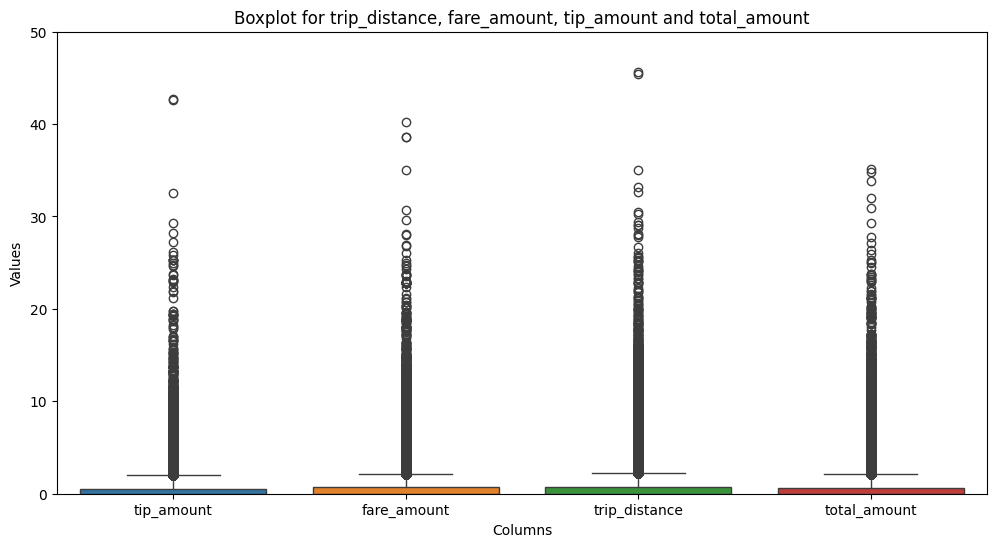

In [30]:
# Do any columns need standardising?

# yes, the below three columns shows in analysis having different values where most of them find in same range with few outliers

# trip distance
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1

df['trip_distance'] = (df['trip_distance'] - df['trip_distance'].median()) / iqr

# fare amount 
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1

df['fare_amount'] = (df['fare_amount'] - df['fare_amount'].median()) / iqr

# tip amount 
q1 = df['tip_amount'].quantile(0.25)
q3 = df['tip_amount'].quantile(0.75)
iqr = q3 - q1

df['tip_amount'] = (df['tip_amount'] - df['tip_amount'].median()) / iqr

# total amount
q1 = df['total_amount'].quantile(0.25)
q3 = df['total_amount'].quantile(0.75)
iqr = q3 - q1

df['total_amount'] = (df['total_amount'] - df['total_amount'].median()) / iqr

columns_to_plot = ['tip_amount', 'fare_amount', 'trip_distance', 'total_amount']

# create the boxplot 
plt.figure(figsize=(12,6))  # Adjust the figure size if needed
sns.boxplot(data = df[columns_to_plot])

# Add labels and title
plt.title("Boxplot for trip_distance, fare_amount, tip_amount and total_amount")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.ylim(0,50)

plt.show()

In [31]:
df[['fare_amount', 'tip_amount', 'total_amount']].describe()

fare_amount     tip_amount   total_amount
count  368415.000000  368415.000000  368415.000000
mean        0.515360       0.210916       0.555705
std        18.772083       1.170743      16.183062
min        -1.071429      -0.828986      -1.434426
25%        -0.333333      -0.539130      -0.344262
50%         0.000000       0.000000       0.000000
75%         0.666667       0.460870       0.655738
max     11361.107143      42.733333    9777.762978

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [32]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

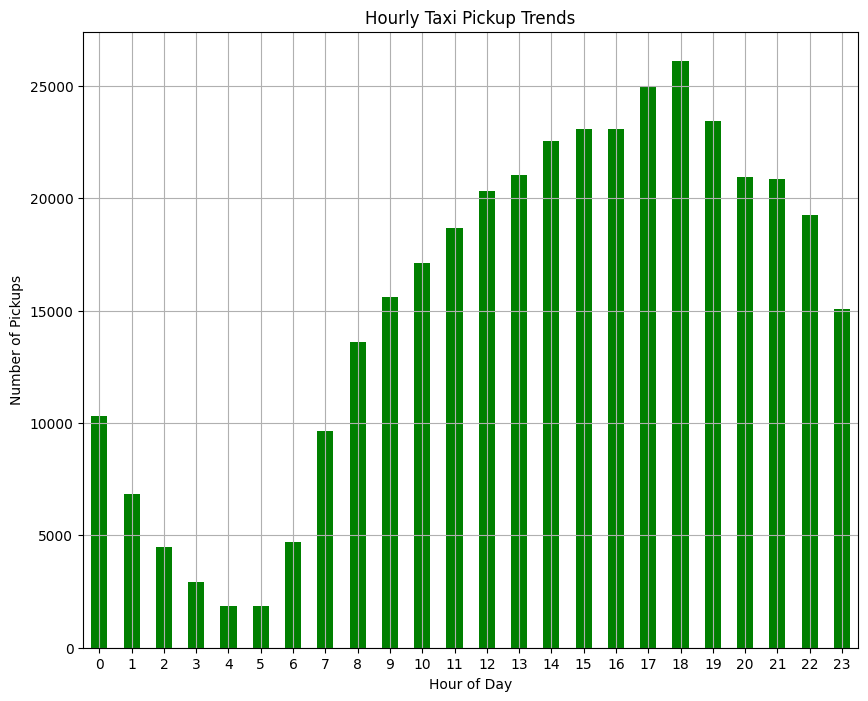

In [33]:
# Find and show the hourly trends in taxi pickups

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Dates hours

df["hour"] = df["tpep_pickup_datetime"].dt.hour

# hourly Trends for Grouping
hourly_Trends = df.groupby("hour").size()

# Plot hourly Trends
plt.figure(figsize = (10, 8))

hourly_Trends.plot(kind ="bar", color = "green")
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


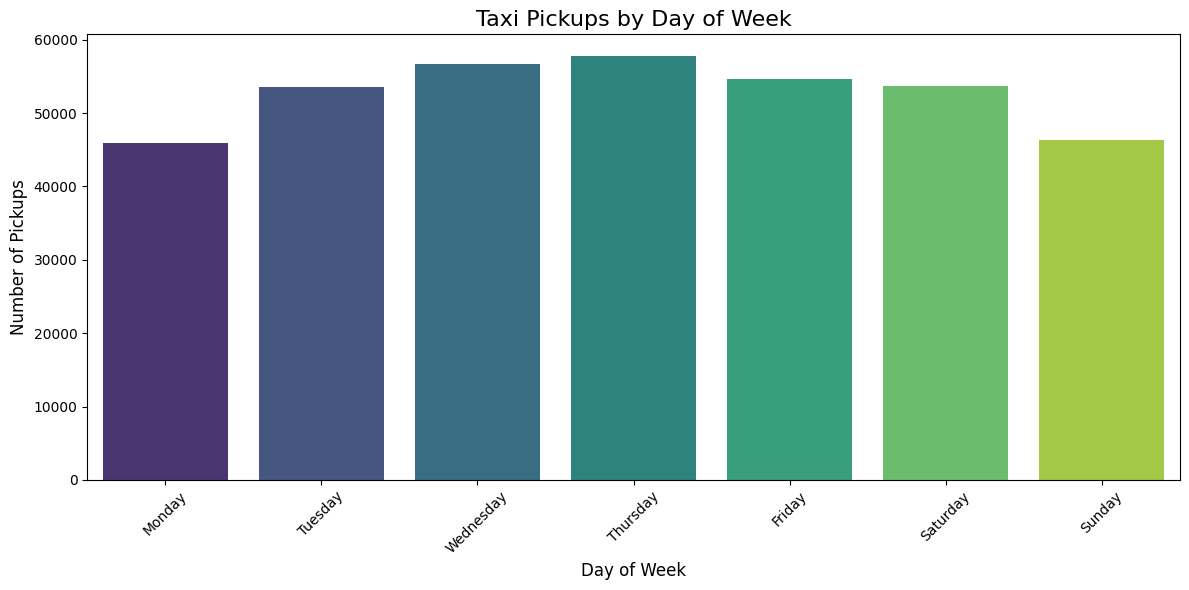

In [34]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_name'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculating daily pickup counts
daily_counts = df.groupby(['day_of_week', 'day_name']).size().reset_index(name='pickup_count')
daily_counts = daily_counts.sort_values('day_of_week')

# Create ordered list of day names for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts['day_name'] = pd.Categorical(daily_counts['day_name'], categories=day_order, ordered=True)
daily_counts = daily_counts.sort_values('day_name')

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='pickup_count', data=daily_counts, 
            palette='viridis', order=day_order,legend=False)

plt.title('Taxi Pickups by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)

plt.tight_layout()
plt.show()

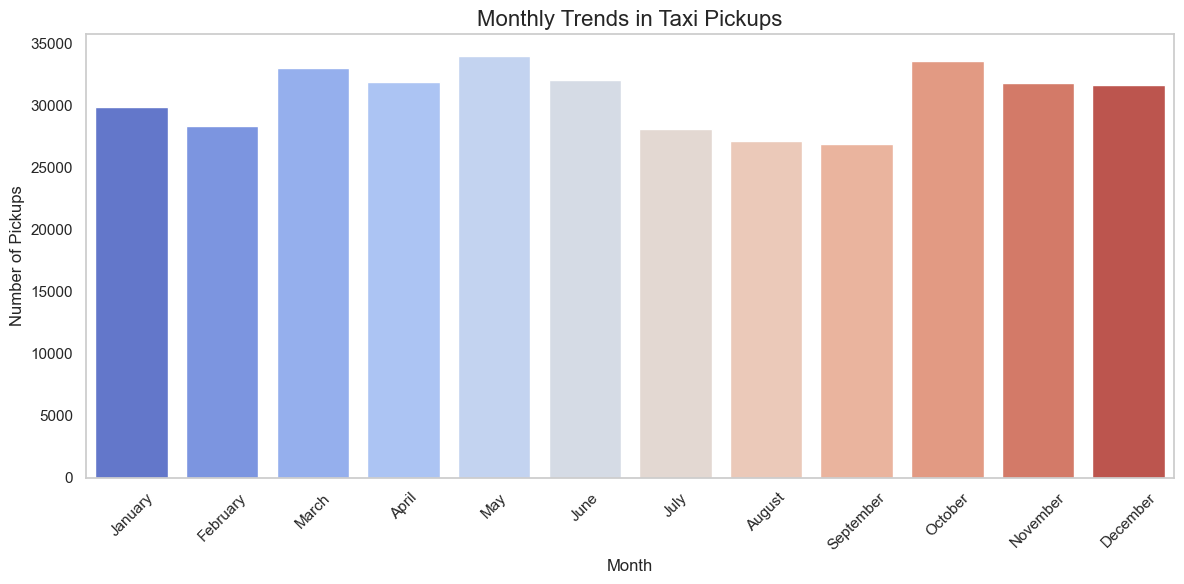

In [36]:
# Show the monthly trends in pickups

# Set Seaborn style
sns.set(style="whitegrid")

# Extract month name from pickup datetime
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Order the months properly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Group by month
monthly_pickups = df.groupby('month').size().reset_index(name='pickup_count')
monthly_pickups = monthly_pickups.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_pickups, x='month', y='pickup_count', palette='coolwarm')
plt.title('Monthly Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [37]:
# Analyse the above parameters

# List of columns to analyze
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero and negative values
for col in financial_cols:
    total_count = len(df)
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    
    
    print(f"\nColumn: {col}")
    print(f" - Total rows: {total_count}")
    print(f" - Zero values: {zero_count} ({(zero_count/total_count)*100:.2f}%)")
    print(f" - Negative values: {negative_count} ({(negative_count/total_count)*100:.2f}%)")

# Show basic descriptive stats
print("\nDescriptive statistics:")
print(df[financial_cols].describe())


Column: fare_amount
 - Total rows: 368415
 - Zero values: 12299 (3.34%)
 - Negative values: 178901 (48.56%)

Column: tip_amount
 - Total rows: 368415
 - Zero values: 1738 (0.47%)
 - Negative values: 182677 (49.58%)

Column: total_amount
 - Total rows: 368415
 - Zero values: 4533 (1.23%)
 - Negative values: 182850 (49.63%)

Column: trip_distance
 - Total rows: 368415
 - Zero values: 787 (0.21%)
 - Negative values: 183672 (49.85%)

Descriptive statistics:
         fare_amount     tip_amount   total_amount  trip_distance
count  368415.000000  368415.000000  368415.000000  368415.000000
mean        0.515360       0.210916       0.555705       0.726231
std        18.772083       1.170743      16.183062       1.997183
min        -1.071429      -0.828986      -1.434426      -0.783186
25%        -0.333333      -0.539130      -0.344262      -0.318584
50%         0.000000       0.000000       0.000000       0.000000
75%         0.666667       0.460870       0.655738       0.681416
max     11361

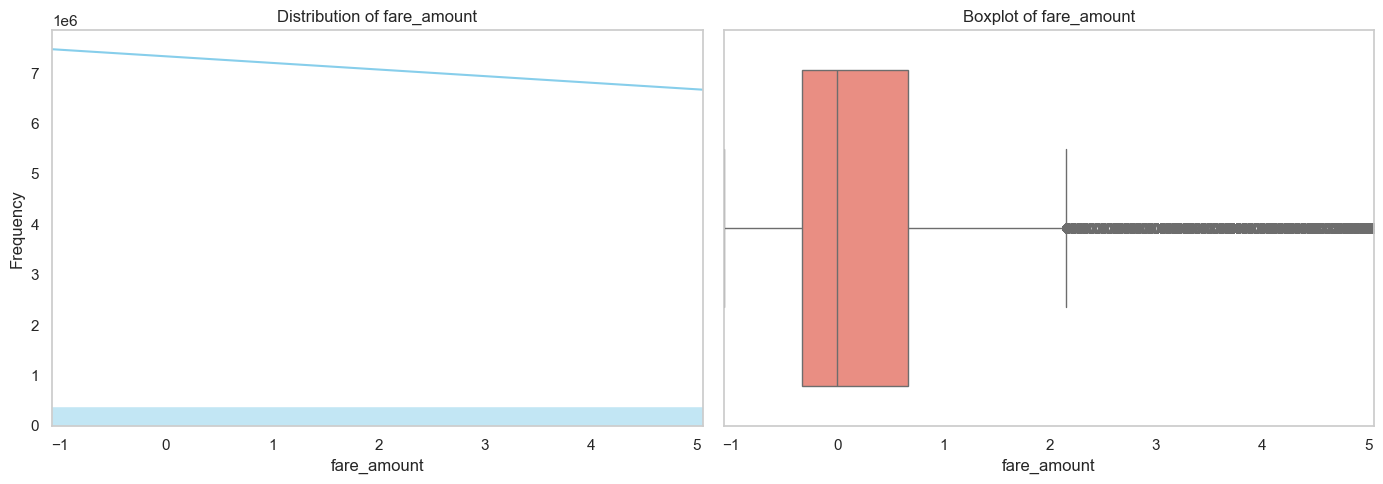

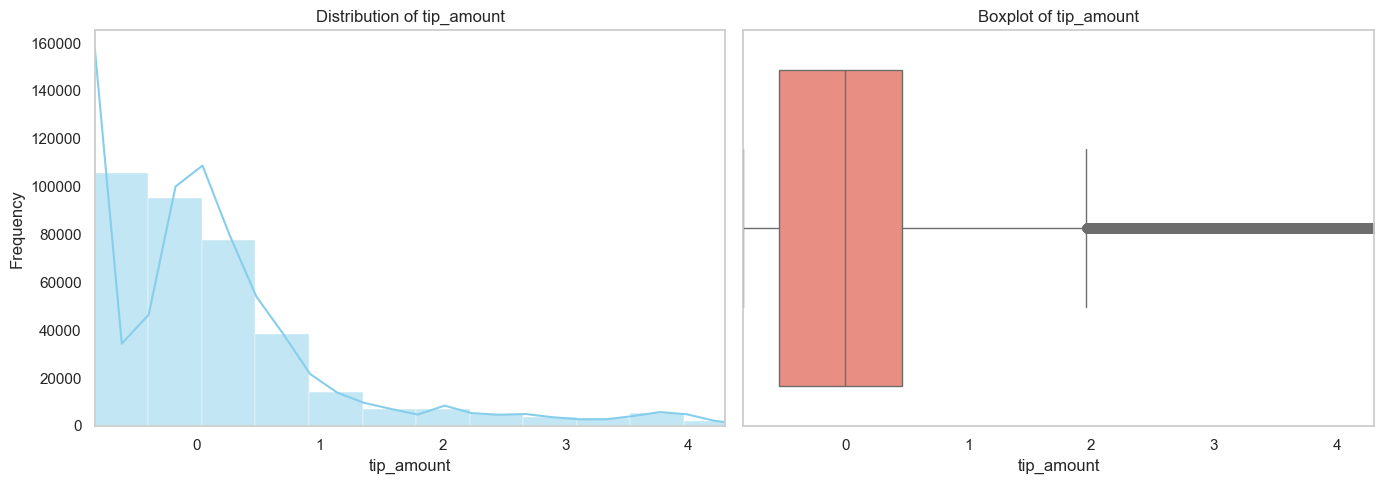

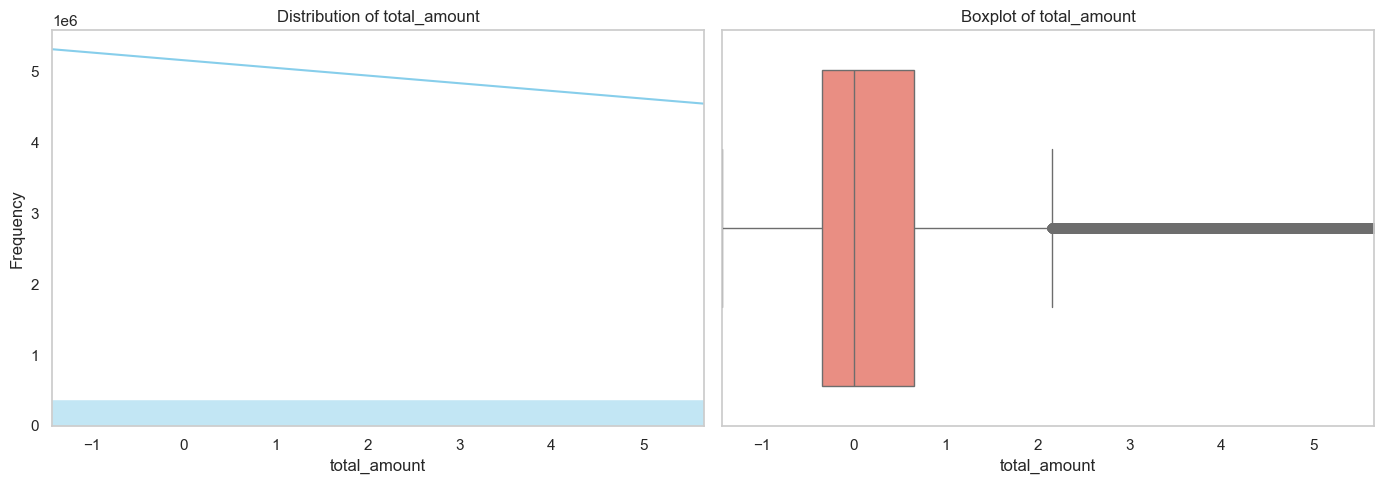

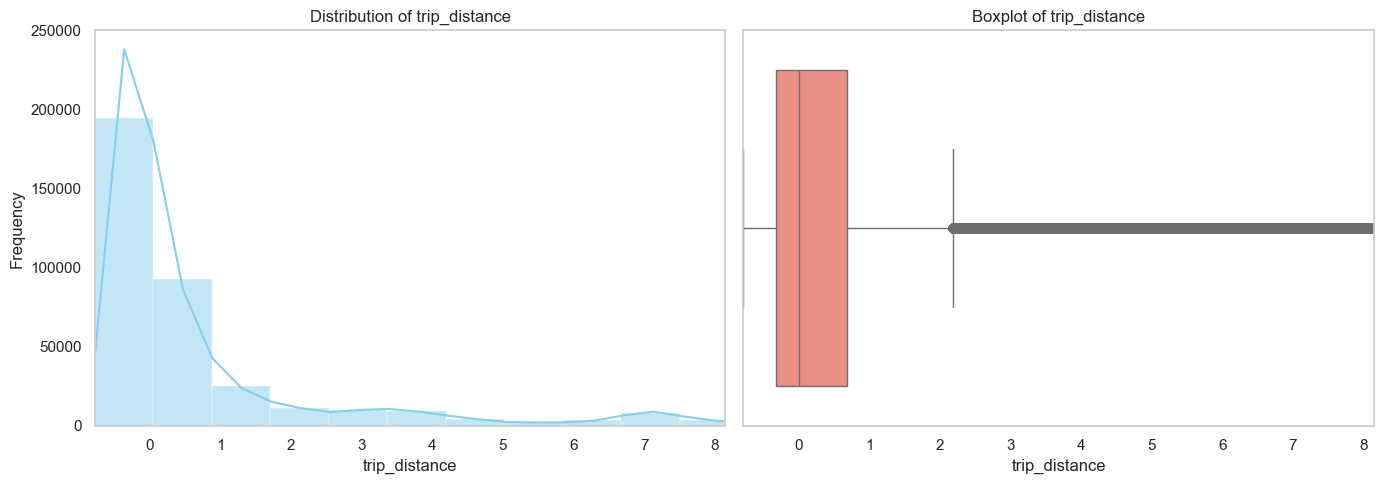

In [38]:
# Plot histograms and boxplots


for col in financial_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=100, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xlim(df[col].min(), df[col].quantile(0.99))  # limit extreme values for better view
    plt.grid(False)
    
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.xlim(df[col].min(), df[col].quantile(0.99))  # focus on 99% range
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.

cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create new DataFrame excluding rows with any zero in the specified columns
df_nonzero = df[(df['fare_amount'] != 0) &
                (df['tip_amount'] != 0) &
                (df['total_amount'] != 0) &
                (df['trip_distance'] != 0)]

# Preview result
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size (no zeros in key financial columns): {df_nonzero.shape[0]}")
df_nonzero[cols].describe()

Original dataset size: 368415
Filtered dataset size (no zeros in key financial columns): 352112


fare_amount     tip_amount   total_amount  trip_distance
count  352112.000000  352112.000000  352112.000000  352112.000000
mean        0.540226       0.224259       0.582918       0.759223
std        19.201359       1.191452      16.552926       2.036231
min        -1.071429      -0.828986      -1.434426      -0.783186
25%        -0.333333      -0.539130      -0.362022      -0.327434
50%        -0.055556      -0.002899      -0.004781      -0.004425
75%         0.722222       0.489855       0.699454       0.752212
max     11361.107143      42.733333    9777.762978      82.115044

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

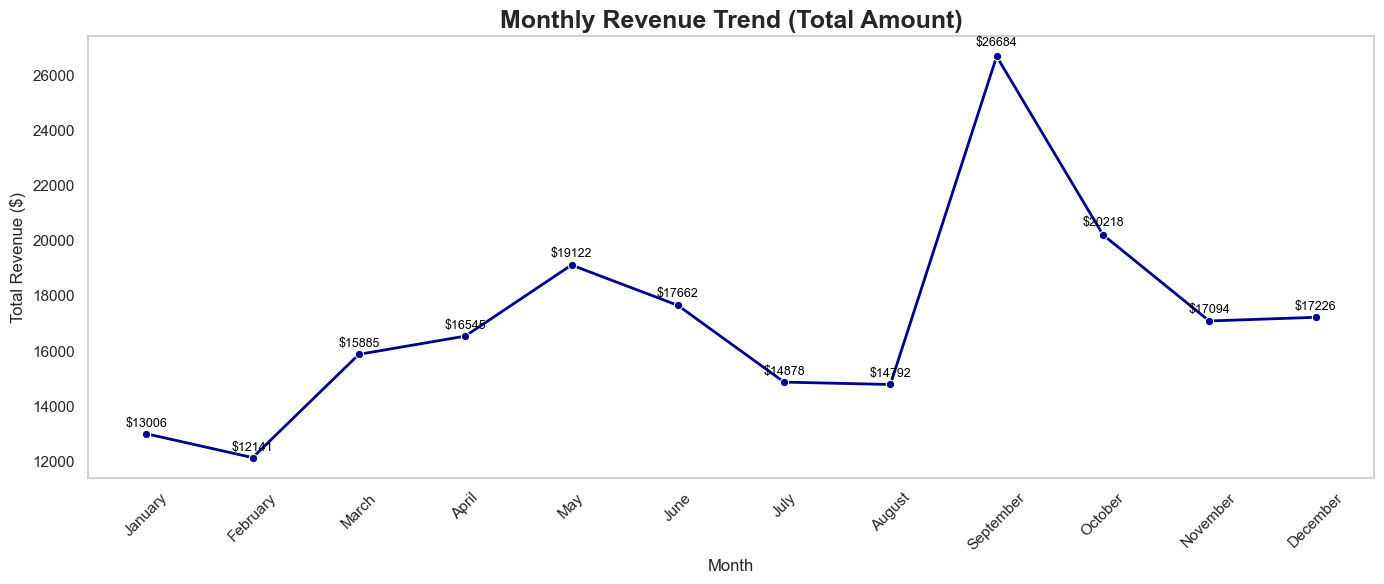

In [40]:
# Group data by month and analyse monthly revenue

# Set seaborn style
sns.set(style="whitegrid")

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Prepare data (assuming df_nonzero already has 'month' as categorical)
monthly_revenue = df_nonzero.groupby('month')['total_amount'].sum().reindex(months_order).reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o', color='darkblue', linewidth=2)

# Add data labels
for i, row in monthly_revenue.iterrows():
    plt.text(i, row['total_amount'] + row['total_amount'] * 0.01,  # slight offset
             f"${row['total_amount']:.0f}", 
             ha='center', va='bottom', fontsize=9, color='black')

# Titles and labels
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

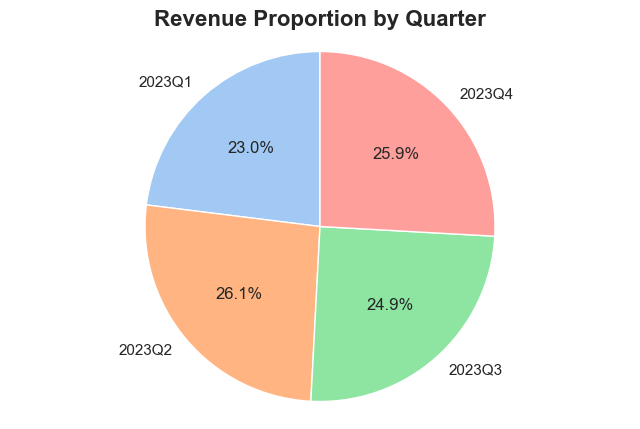

  quarter   total_amount  proportion
0  2023Q1   90920.653005   23.029129
1  2023Q2  103191.217896   26.137118
2  2023Q3   98500.024590   24.948894
3  2023Q4  102195.280738   25.884859


In [41]:
# Calculate proportion of each quarter

median_total = df_nonzero[df_nonzero['total_amount'] > 0]['total_amount'].median()
df_nonzero.loc[df_nonzero['total_amount'] < 0, 'total_amount'] = median_total

# Extract quarter from pickup datetime
df_nonzero['quarter'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

# Group by quarter and sum revenue
quarterly_revenue = df_nonzero.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Plot as pie chart
plt.figure(figsize=(8, 5))
colors = sns.color_palette('pastel')[0:4]
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Revenue Proportion by Quarter', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular

plt.show()

# Print the revenue proportions
print(quarterly_revenue)


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip distance and fare amount: 0.9432


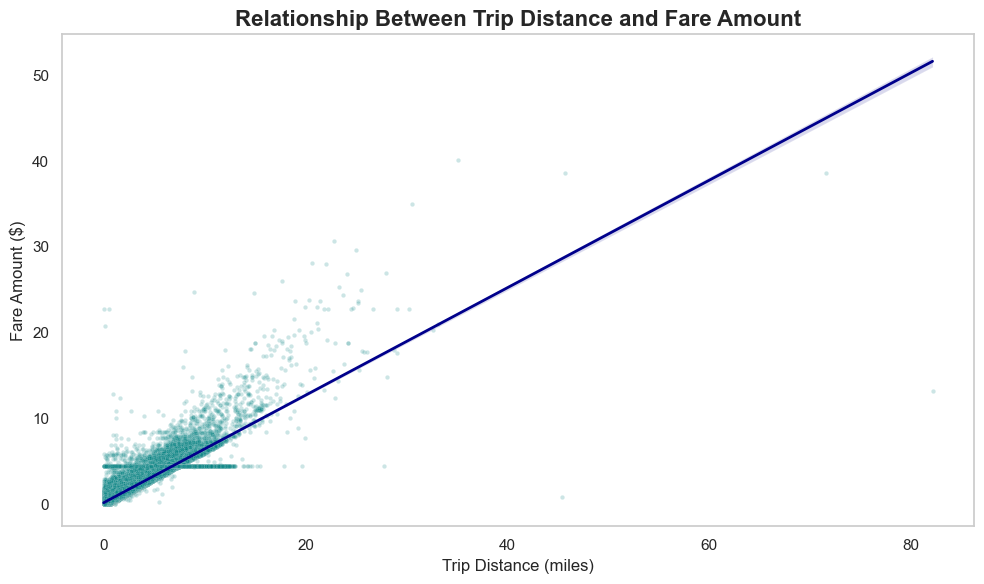

In [42]:
# Show how trip fare is affected by distance

# Filter out zero or negative distances or fares
df_dist_fare = df_nonzero[(df_nonzero['trip_distance'] > 0) & (df_nonzero['fare_amount'] > 0)]

# Calculate correlation
correlation = df_dist_fare['trip_distance'].corr(df_dist_fare['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dist_fare, x='trip_distance', y='fare_amount', alpha=0.2, s=10, color='teal')
sns.regplot(data=df_dist_fare, x='trip_distance', y='fare_amount', scatter=False, color='darkblue', line_kws={'linewidth':2})

plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=16, fontweight='bold')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip duration and fare amount: 0.7090


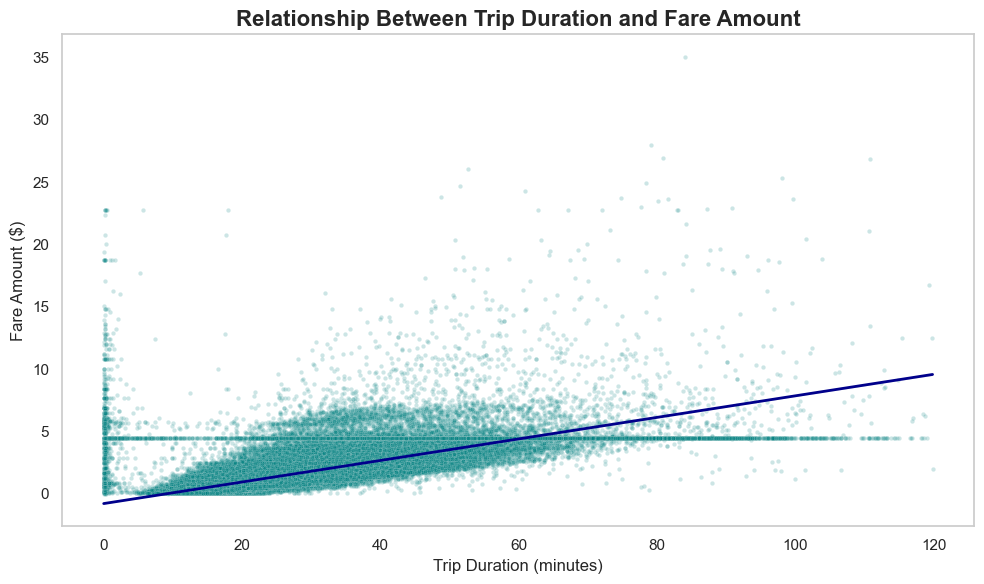

In [43]:
# Show relationship between fare and trip duration

# Step1: datatime format
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'])

# setp2: Calculate trip duration in minutes
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Step 3: Filter out invalid or extreme values for better visualization
df_fare_duration = df_nonzero[
    (df_nonzero['trip_duration'] > 0) &
    (df_nonzero['trip_duration'] <= 120) &  # Optional: limit to 2 hours for clean plot
    (df_nonzero['fare_amount'] > 0) &
    (df_nonzero['fare_amount'] <= 100)       # Optional: limit high fare outliers
]

# Step 4: Compute correlation
correlation = df_fare_duration['trip_duration'].corr(df_fare_duration['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.4f}")

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fare_duration, x='trip_duration', y='fare_amount', alpha=0.2, s=10, color='teal')
sns.regplot(data=df_fare_duration, x='trip_duration', y='fare_amount', scatter=False, color='darkblue', line_kws={'linewidth': 2})

plt.title('Relationship Between Trip Duration and Fare Amount', fontsize=16, fontweight='bold')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()

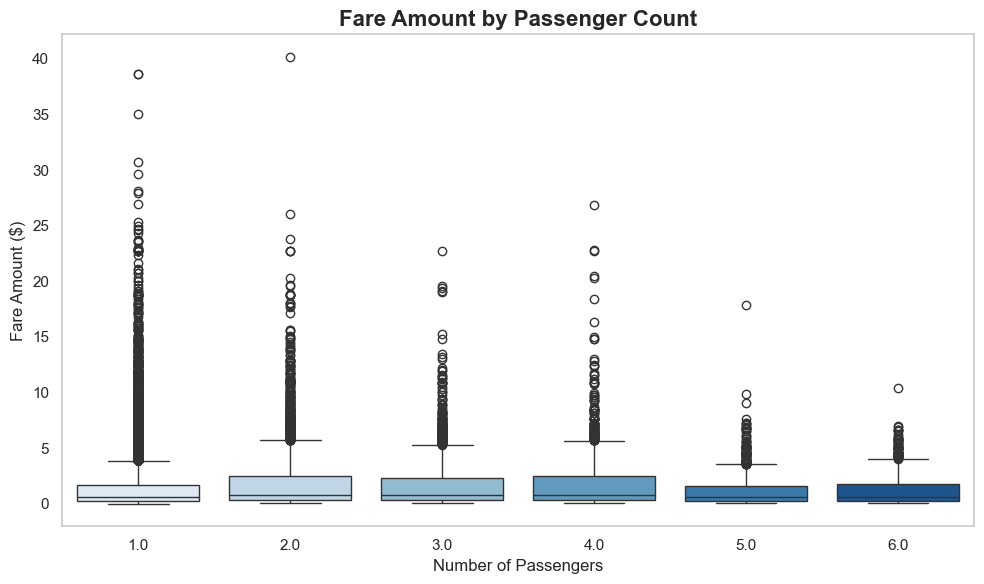

Correlation between passenger count and fare amount: 0.0496


In [44]:
# Show relationship between fare and number of passengers

# Filter out invalid values
df_passenger_fare = df_nonzero[
    (df_nonzero['passenger_count'] > 0) &
    (df_nonzero['fare_amount'] > 0) &
    (df_nonzero['fare_amount'] <= 100)  # Optional: remove high outliers for clarity
]

# Optional: limit to common passenger counts (1–6)
df_passenger_fare = df_passenger_fare[df_passenger_fare['passenger_count'] <= 6]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_passenger_fare, x='passenger_count', y='fare_amount', palette='Blues')

plt.title('Fare Amount by Passenger Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()

# Optional: Show correlation
correlation = df_passenger_fare['passenger_count'].corr(df_passenger_fare['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.4f}")


Correlation between trip distance and tip amount: 0.803


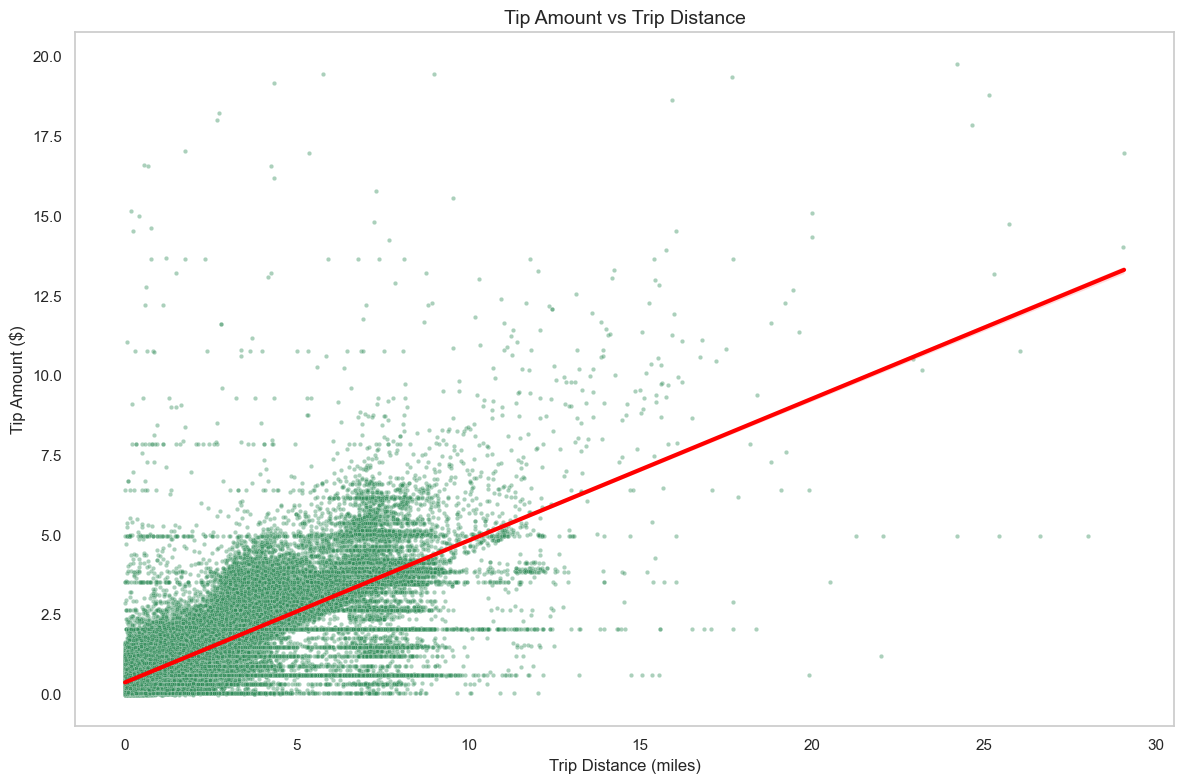

In [45]:
# Show relationship between tip and trip distance

# Filter out zero/negative values and outliers for clarity
df_tip_distance = df_nonzero[
    (df_nonzero['trip_distance'] > 0) &
    (df_nonzero['tip_amount'] >= 0) &
    (df_nonzero['trip_distance'] <= 30) &  # optional: focus on realistic trips
    (df_nonzero['tip_amount'] <= 20)       # optional: focus on usual tipping range
]

# Calculate correlation
correlation = df_tip_distance['trip_distance'].corr(df_tip_distance['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.3f}")

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tip_distance, x='trip_distance', y='tip_amount', alpha=0.4, s=10, color='seagreen')
sns.regplot(data=df_tip_distance, x='trip_distance', y='tip_amount', scatter=False, color='red', line_kws={'linewidth': 3})

plt.title('Tip Amount vs Trip Distance', fontsize=14, fontweight='light')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

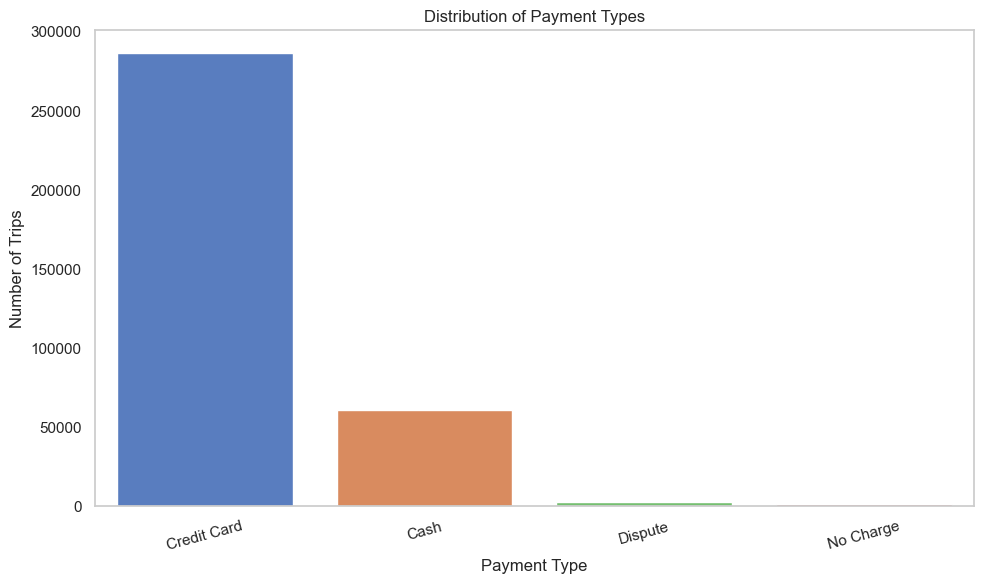

  Payment Type   Count  Percentage
0  Credit Card  286640      81.406
1         Cash   61079      17.346
2      Dispute    2681       0.761
3    No Charge    1712       0.486


In [46]:
# Analyse the distribution of different payment types (payment_type).

# Mapping codes to labels (adjust if your data uses different mappings)
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Apply mapping
df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_mapping)

# Count each type
payment_counts = df_nonzero['payment_type_label'].value_counts().reset_index()
payment_counts.columns = ['Payment Type', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Payment Type', y='Count', palette='muted')
plt.title('Distribution of Payment Types', fontsize=12, fontweight='light')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(False)
plt.show()

# Optional: show percentages
total = payment_counts['Count'].sum()
payment_counts['Percentage'] = (payment_counts['Count'] / total * 100).round(3)
print(payment_counts)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [47]:
!pip install geopandas
!pip install scikit-learn
!python -m pip install --upgrade pip

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [48]:
import geopandas as gpd


# Read the shapefile using geopandas
# read the .shp file using gpd
zones = gpd.read_file("D://EDA_NYC_Taxi Datasets and Dictionary//taxi_zones//taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

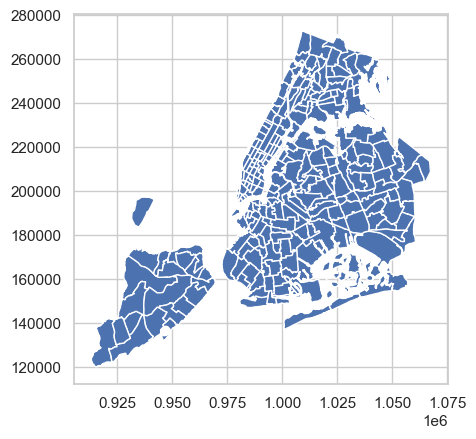

In [49]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [50]:
# Merge zones and trip records using locationID and PULocationID
df_geo = df_nonzero.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
df_geo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15             1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46             2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36             3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55             1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33             2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0       2.641593         1.0           138           256             2   
1      -0.234513         1.0           161           237             1   
2      -0.146018         1.0           237           141             2   
3      -0.544248         1.0           143           142             2   
4       2.358407         1.0           246            37             1   

   fare_amount  ...  airport_fee  day_of_week  day_name    month  quarter  \
0     1.500000  ...         1.25            6    Sunday  January   2023Q1   
1    -0.444444  ...         0.00            6    Sunday  January   2023Q1   
2    -0.166667  ...         0.00            6    Sunday  January   2023Q1   
3    -0.555556  ...         0.00            6    Sunday  January   2023Q1   
4     1.666667  ...         0.00            6    Sunday  January   2023Q1   

   trip_duration  payment_type_label LocationID                       zone  \
0      15.950000                Cash      138.0          LaGuardia Airport   
1       5.083333         Credit Card      161.0             Midtown Center   
2      10.550000                Cash      237.0      Upper East Side South   
3       5.416667                Cash      143.0        Lincoln Square West   
4      33.616667         Credit Card      246.0  West Chelsea/Hudson Yards   

     borough  
0     Queens  
1  Manhattan  
2  Manhattan  
3  Manhattan  
4  Manhattan  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [51]:
# Group data by location and calculate the number of trips

pickup_counts = df_geo.groupby('PULocationID').size().reset_index(name='trip_count')

pickup_counts.head()

PULocationID  trip_count
0             1          53
1             3           2
2             4         340
3             6           4
4             7         147

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [52]:
# Merge trip counts back to the zones GeoDataFrame

zones_trips = zones.merge(
    pickup_counts[['PULocationID', 'trip_count']],
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Fill NaN trip counts with 0 (zones that had no trips)
zones_trips['trip_count'] = zones_trips['trip_count'].fillna(0).astype(int)

# Preview
zones_trips[['LocationID', 'zone', 'borough', 'trip_count']].head()


LocationID                     zone        borough  trip_count
0           1           Newark Airport            EWR          53
1           2              Jamaica Bay         Queens           0
2           3  Allerton/Pelham Gardens          Bronx           2
3           4            Alphabet City      Manhattan         340
4           5            Arden Heights  Staten Island           0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

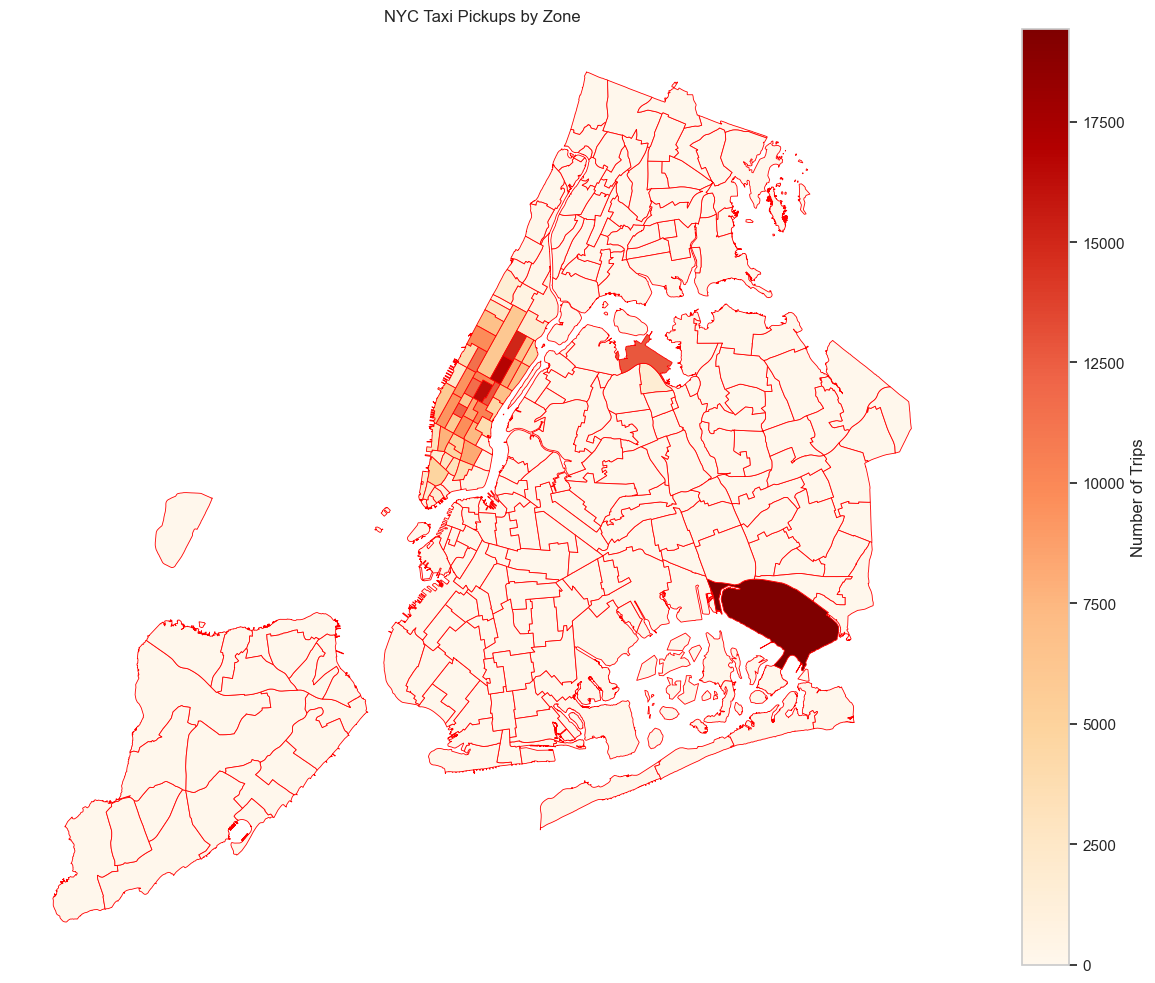

In [53]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot the map and display it

zones_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',  # Orange-Red color map
    linewidth=0.6,
    edgecolor='red',
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    }
)

# Add a title and styling
ax.set_title("NYC Taxi Pickups by Zone", fontsize=12, fontweight='light')
ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [54]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_trips.sort_values('trip_count', ascending=False)

# display top 20 zones by trip count
sorted_zones[['LocationID', 'zone', 'borough', 'trip_count']].head(15)

LocationID                          zone    borough  trip_count
131         132                   JFK Airport     Queens       19417
236         237         Upper East Side South  Manhattan       16791
160         161                Midtown Center  Manhattan       16349
235         236         Upper East Side North  Manhattan       15034
137         138             LaGuardia Airport     Queens       12808
161         162                  Midtown East  Manhattan       12702
185         186  Penn Station/Madison Sq West  Manhattan       12137
229         230     Times Sq/Theatre District  Manhattan       11640
141         142           Lincoln Square East  Manhattan       11515
169         170                   Murray Hill  Manhattan       10370
162         163                 Midtown North  Manhattan       10172
238         239         Upper West Side South  Manhattan        9742
233         234                      Union Sq  Manhattan        9665
47           48                  Clinton East  Manhattan        9402
67           68                  East Chelsea  Manhattan        9259

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [55]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in hours
df_geo['trip_duration_hrs'] = (df_geo['tpep_dropoff_datetime'] - df_geo['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter out entries with 0 or negative duration or distance
valid_trips = df_geo[(df_geo['trip_duration_hrs'] > 0) & (df_geo['trip_distance'] > 0)]

# Group by route and hour, and calculate average duration and average distance
grouped = valid_trips.groupby(['PULocationID', 'DOLocationID', 'hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()

# Calculate speed
grouped['speed_mph'] = grouped['trip_distance'] / grouped['trip_duration_hrs']

# Find the slowest routes (lowest average speed)
slowest_routes = grouped.sort_values('speed_mph').head(15)

# Display result
print(slowest_routes)


       PULocationID  DOLocationID  hour  trip_distance  trip_duration_hrs  \
10708            88           144     0       0.004425          23.757778   
35926           164           233    21       0.039823          23.973333   
13653           107           158    19       0.033923          15.983519   
52721           249           164     1       0.017699           5.724722   
41394           229           137     2       0.075221          23.904167   
53089           249           246     9       0.081858          12.038194   
46322           234           232    14       0.163717          23.889722   
53842           261           232    10       0.004425           0.634722   
3885             48           162    12       0.004425           0.628889   
49882           239            24    19       0.086283          12.043333   
37886           181           132    20       0.230088          24.996944   
1486             33            25    17       0.004425           0.470833   

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18:00 with 25,058 trips


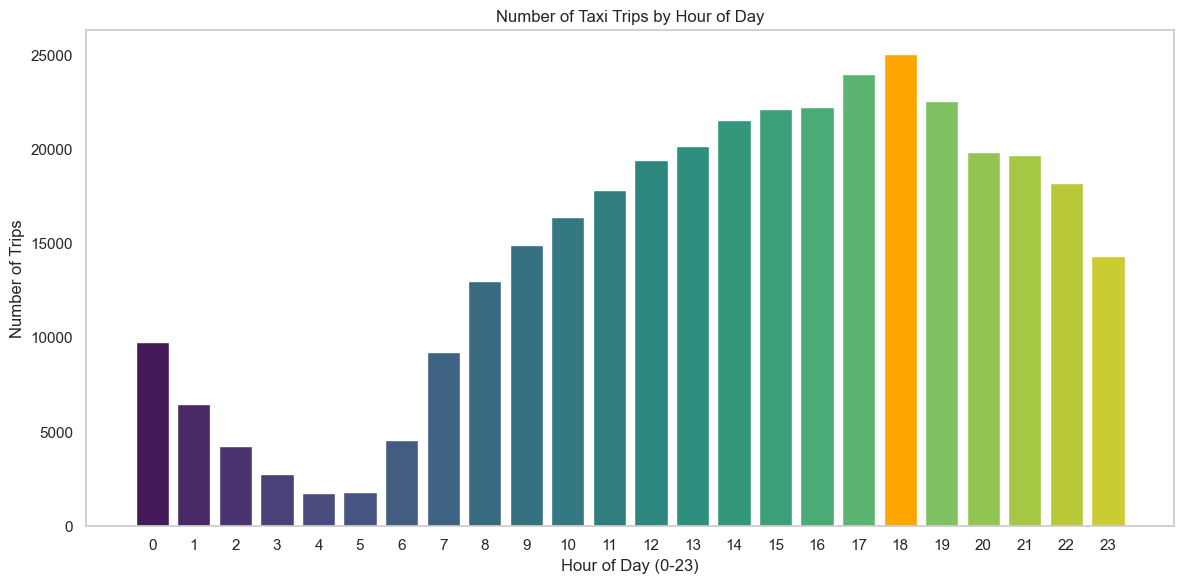

In [56]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per hour
trips_per_hour = df_geo['hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_count = trips_per_hour.max()

print(f"Busiest Hour: {busiest_hour}:00 with {busiest_count:,} trips")

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

# Highlight the busiest hour in a different color
plt.bar(busiest_hour, busiest_count, color='orange')

plt.title('Number of Taxi Trips by Hour of Day', fontsize=12)
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(False)

plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [57]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction =0.2

trips_per_hour = df_geo['hour'].value_counts().sort_values(ascending=False)

hours_scaled = (trips_per_hour / sample_fraction).astype(int)

hours_scaled_df = hours_scaled.reset_index()
hours_scaled_df

hour   count
0     18  125290
1     17  119970
2     19  112795
3     16  111135
4     15  110695
5     14  107820
6     13  100865
7     20   99190
8     21   98615
9     12   97180
10    22   91175
11    11   89145
12    10   81980
13     9   74645
14    23   71595
15     8   65075
16     0   48900
17     7   46255
18     1   32395
19     6   22750
20     2   21350
21     3   13875
22     5    9075
23     4    8860

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

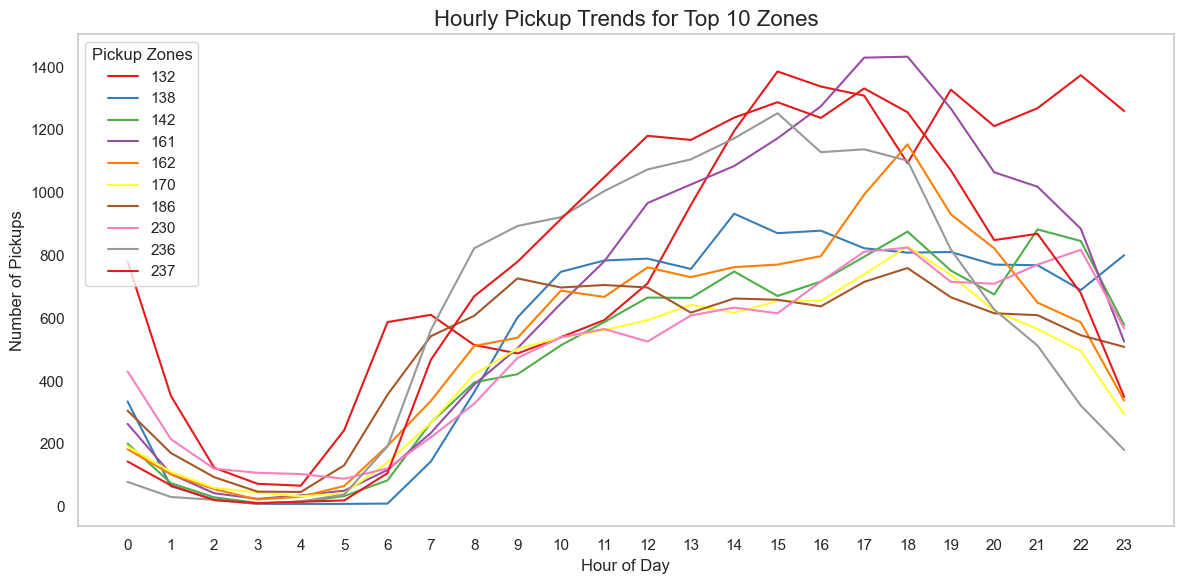

In [58]:
# Compare traffic trends for the week days and weekends

# Count hourly pickups by PULocationID
pickup_counts_by_zone = df_geo.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count')

# Identify top 10 pickup zones by total pickup count
top_pickup_zones = pickup_counts_by_zone.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False).head(10)

# Count hourly dropoffs by DOLocationID
dropoff_counts_by_zone = df_geo.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count')

# Identify top 10 dropoff zones by total dropoff count
top_dropoff_zones = dropoff_counts_by_zone.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_counts_by_zone[pickup_counts_by_zone['PULocationID'].isin(top_pickup_zones.index)],
             x='hour', y='pickup_count', hue='PULocationID', palette='Set1')

plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(False)
plt.legend(title='Pickup Zones')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

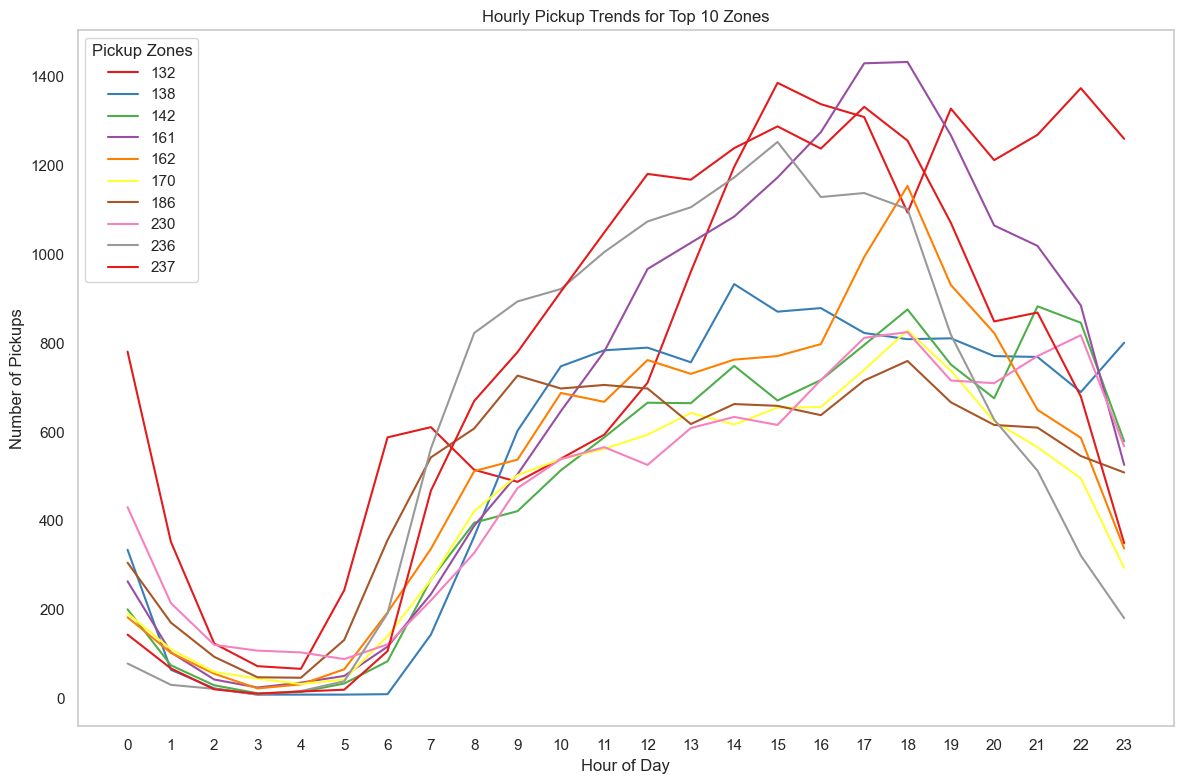

In [59]:
# Find top 10 pickup and dropoff zones

plt.figure(figsize=(12, 8))
sns.lineplot(data=pickup_counts_by_zone[pickup_counts_by_zone['PULocationID'].isin(top_pickup_zones.index)],
             x='hour', y='pickup_count', hue='PULocationID', palette='Set1')

plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(False)
plt.legend(title='Pickup Zones')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [60]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Group by PULocationID and DOLocationID to get pickup and dropoff counts
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

# Combine counts into one DataFrame
pickup_dropoff_df = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Calculate pickup/dropoff ratio
pickup_dropoff_df['pickup_dropoff_ratio'] = pickup_dropoff_df['pickup_count'] / pickup_dropoff_df['dropoff_count'].replace(0, np.nan)

# Remove duplicate LocationID values in zones to avoid InvalidIndexError
zones_unique = zones.drop_duplicates(subset='LocationID').set_index('LocationID')

# Map zone names safely
pickup_dropoff_df['zone'] = pickup_dropoff_df.index.map(zones_unique['zone'])

# Top 10 highest pickup/dropoff ratios
top_10_ratios = pickup_dropoff_df.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 lowest pickup/dropoff ratios (excluding dropoff_count = 0 to avoid div-by-zero)
bottom_10_ratios = pickup_dropoff_df[pickup_dropoff_df['dropoff_count'] > 0].sort_values('pickup_dropoff_ratio').head(10)

# Optionally display
print("Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 Zones by Pickup/Dropoff Ratio:
                             zone  pickup_count  dropoff_count  \
70                  East Elmhurst        1679.0            209   
132                   JFK Airport       19480.0           4175   
138             LaGuardia Airport       12844.0           4396   
186  Penn Station/Madison Sq West       12783.0           8261   
43                   Central Park        6322.0           4530   
114       Greenwich Village South        4783.0           3538   
249                  West Village        8241.0           6100   
162                  Midtown East       13395.0          10579   
161                Midtown Center       17349.0          14480   
234                      Union Sq       10126.0           8521   

     pickup_dropoff_ratio  
70               8.033493  
132              4.665868  
138              2.921747  
186              1.547391  
43               1.395585  
114              1.351894  
249              1.350984  
162        

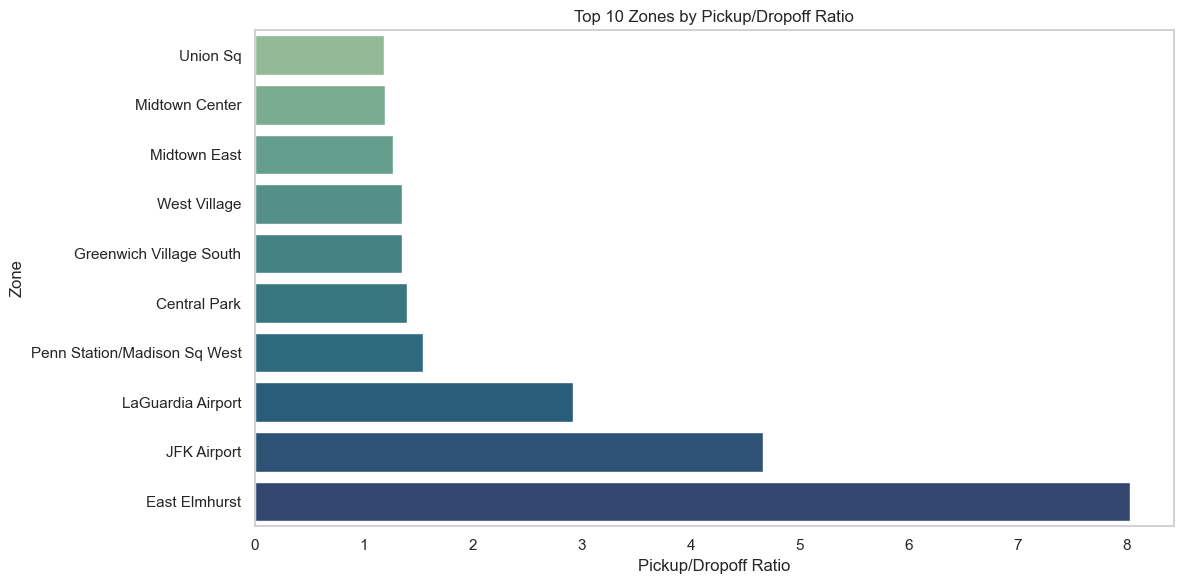

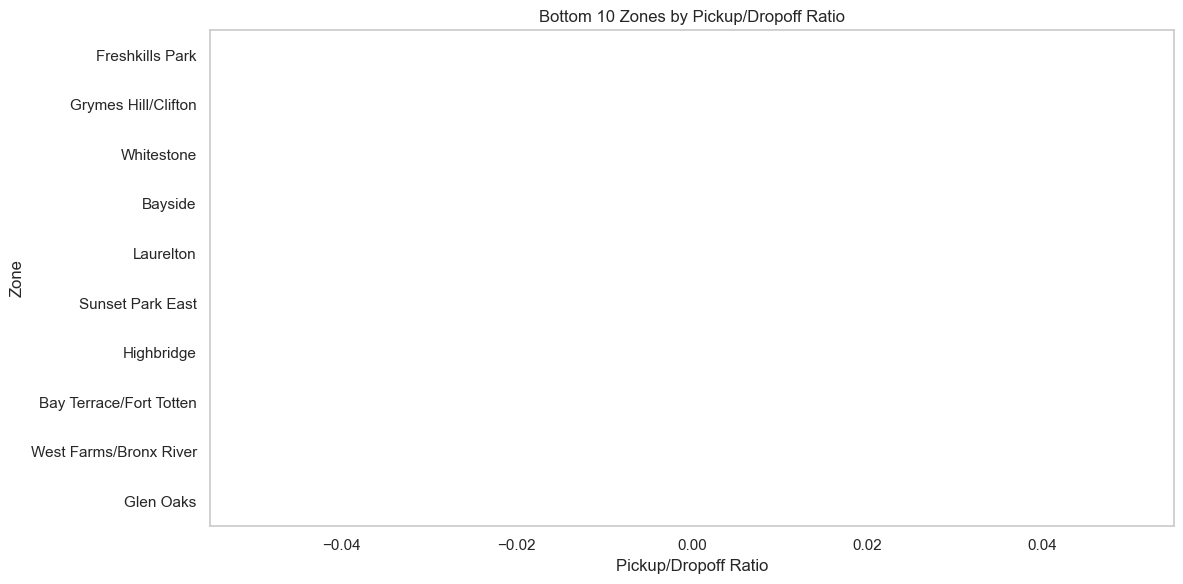

In [61]:
# Set the style
sns.set(style="whitegrid")

# Prepare data for top 10 ratios
top_plot = top_10_ratios.reset_index().sort_values('pickup_dropoff_ratio', ascending=True)

# Plot top 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_plot, x='pickup_dropoff_ratio', y='zone', palette='crest')
plt.title('Top 10 Zones by Pickup/Dropoff Ratio', fontsize=12)
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()

# Prepare data for bottom 10 ratios
bottom_plot = bottom_10_ratios.reset_index().sort_values('pickup_dropoff_ratio', ascending=True)

# Plot bottom 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_plot, x='pickup_dropoff_ratio', y='zone', palette='flare')
plt.title('Bottom 10 Zones by Pickup/Dropoff Ratio', fontsize=12)
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [62]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM inclusive)
night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

# Ensure unique LocationID in zones GeoDataFrame for proper mapping
zone_mapping = zones.drop_duplicates(subset='LocationID').set_index('LocationID')['zone']

# Top 10 pickup zones during night
night_pickups = night_df['PULocationID'].value_counts().head(10).rename_axis('LocationID').reset_index(name='pickup_count')
night_pickups['zone'] = night_pickups['LocationID'].map(zone_mapping)

# Top 10 dropoff zones during night
night_dropoffs = night_df['DOLocationID'].value_counts().head(10).rename_axis('LocationID').reset_index(name='dropoff_count')
night_dropoffs['zone'] = night_dropoffs['LocationID'].map(zone_mapping)

# Display the top pickup and dropoff zones during night hours
print("Top 10 Pickup Zones during Night Hours:")
print(night_pickups)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(night_dropoffs)


Top 10 Pickup Zones during Night Hours:
   LocationID  pickup_count                          zone
0          79          3101                  East Village
1         132          2914                   JFK Airport
2         249          2551                  West Village
3          48          2060                  Clinton East
4         148          1942               Lower East Side
5         230          1728     Times Sq/Theatre District
6         114          1695       Greenwich Village South
7         186          1393  Penn Station/Madison Sq West
8         138          1253             LaGuardia Airport
9         164          1221                 Midtown South

Top 10 Dropoff Zones during Night Hours:
   LocationID  dropoff_count                           zone
0          79           1715                   East Village
1          48           1438                   Clinton East
2         170           1302                    Murray Hill
3         107           1190            

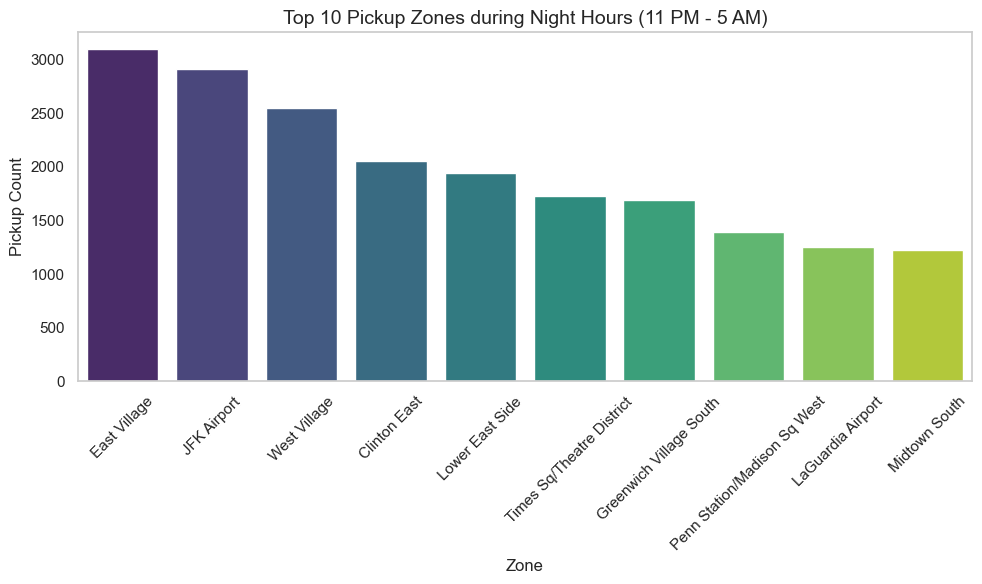

In [63]:
# Visualizing the top 10 pickup zones during night hours
plt.figure(figsize=(10, 6))
sns.barplot(data=night_pickups, x='zone', y='pickup_count', palette='viridis')
plt.title('Top 10 Pickup Zones during Night Hours (11 PM - 5 AM)', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)

plt.grid(False)

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [64]:
# Filter for night hours (11 PM to 5 AM)
# Filter for night hours (11 PM to 5 AM inclusive)
night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

# Filter for daytime hours (6 AM to 10 PM)
day_df = df[(df['hour'] >= 6) & (df['hour'] <= 22)]

# Calculate total revenue for night and day
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

# Calculate total revenue
total_revenue = df['total_amount'].sum()

# Calculate revenue share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Print the results
print(f"Night Time Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f"Day Time Revenue Share (6 AM - 10 PM): {day_revenue_share:.2f}%")


Night Time Revenue Share (11 PM - 5 AM): 12.27%
Day Time Revenue Share (6 AM - 10 PM): 87.73%


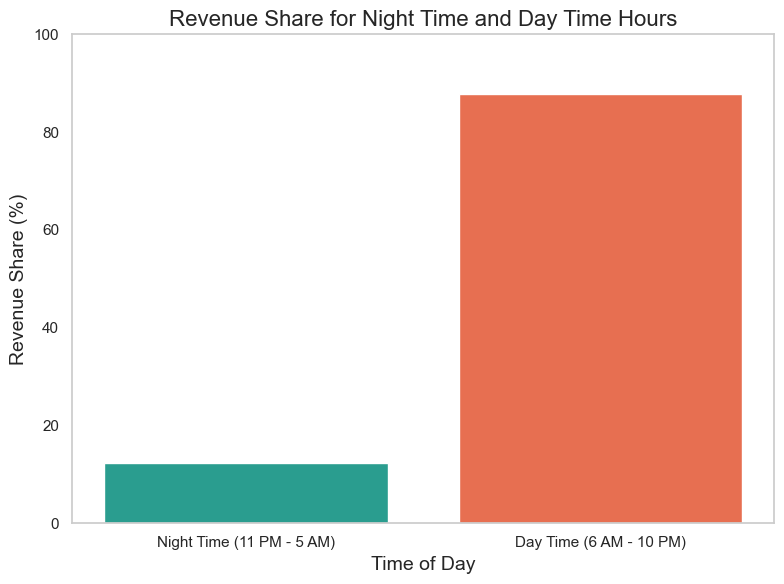

In [65]:
# Data for plotting
labels = ['Night Time (11 PM - 5 AM)', 'Day Time (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#2a9d8f', '#e76f51'])
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Revenue Share (%)', fontsize=14)
plt.title('Revenue Share for Night Time and Day Time Hours', fontsize=16)
plt.ylim(0, 100)

plt.grid(False)

plt.tight_layout()

# Display the plot
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [66]:
df.describe()

VendorID           tpep_pickup_datetime  trip_distance  \
count  368415.000000                         368415  368415.000000   
mean        1.741674  2023-07-01 18:47:55.477372160       0.726231   
min         1.000000            2023-01-01 00:04:34      -0.783186   
25%         1.000000            2023-04-01 19:27:07      -0.318584   
50%         2.000000            2023-06-25 21:47:20       0.000000   
75%         2.000000     2023-10-05 18:38:46.500000       0.681416   
max         2.000000            2023-12-31 23:54:03      82.115044   
std         0.437714                            NaN       1.997183   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  368415.000000  368415.000000  368415.000000  368415.000000   
mean        1.074071     165.673721     164.480507       1.205825   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   
std         0.392566      63.560502      69.636016       0.467112   

         fare_amount          extra        mta_tax     tip_amount  \
count  368415.000000  368415.000000  368415.000000  368415.000000   
mean        0.515360       1.642324       0.495464       0.210916   
min        -1.071429       0.000000       0.000000      -0.828986   
25%        -0.333333       0.000000       0.500000      -0.539130   
50%         0.000000       1.000000       0.500000       0.000000   
75%         0.666667       2.500000       0.500000       0.460870   
max     11361.107143      14.250000       4.000000      42.733333   
std        18.772083       1.828967       0.047864       1.170743   

        tolls_amount  improvement_surcharge   total_amount  \
count  368415.000000          368415.000000  368415.000000   
mean        0.581693               0.999371       0.555705   
min         0.000000               0.000000      -1.434426   
25%         0.000000               1.000000      -0.344262   
50%         0.000000               1.000000       0.000000   
75%         0.000000               1.000000       0.655738   
max       143.000000               1.000000    9777.762978   
std         2.156045               0.023260      16.183062   

       congestion_surcharge           hour    airport_fee    day_of_week  
count         368415.000000  368415.000000  368415.000000  368415.000000  
mean               2.322720      14.330280       0.142541       2.998629  
min                0.000000       0.000000       0.000000       0.000000  
25%                2.500000      11.000000       0.000000       1.000000  
50%                2.500000      15.000000       0.000000       3.000000  
75%                2.500000      19.000000       0.000000       5.000000  
max                2.500000      23.000000       1.750000       6.000000  
std                0.641695       5.765455       0.464121       1.928301

In [67]:
# Analyse the fare per mile per passenger for different passenger counts
df = df[
    (df['fare_amount']  > 0) &
    (df['trip_distance']  > 0) &
    (df['passenger_count']> 0)]
    
# Calculate Fare per Mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Calculate Fare per Mile per Passenger
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']
df['fare_per_mile_per_passenger']

0         0.567839
5         0.353346
7         0.722622
8         0.556123
11        1.118812
            ...   
383646    0.617486
383652    0.609111
383655    0.329458
383657    0.378831
383658    0.648377
Name: fare_per_mile_per_passenger, Length: 155313, dtype: object

In [68]:
 df[['fare_amount']].describe()

fare_amount
count  155313.000000
mean        1.454651
std         1.652592
min         0.037302
25%         0.333333
50%         0.777778
75%         2.000000
max        40.166667

In [69]:
df.describe()

VendorID           tpep_pickup_datetime  trip_distance  \
count  155313.000000                         155313  155313.000000   
mean        1.770019  2023-07-02 19:28:42.225228800       2.059274   
min         1.000000            2023-01-01 00:06:39       0.004425   
25%         2.000000            2023-04-04 15:52:36       0.384956   
50%         2.000000            2023-06-27 08:53:13       0.920354   
75%         2.000000            2023-10-05 20:19:21       3.017699   
max         2.000000            2023-12-31 23:53:18      82.115044   
std         0.420822                            NaN       2.485402   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  155313.000000  155313.000000  155313.000000  155313.000000   
mean        1.131451     158.900652     157.150882       1.184840   
min         1.000000       4.000000       1.000000       1.000000   
25%         1.000000     132.000000     100.000000       1.000000   
50%         1.000000     144.000000     161.000000       1.000000   
75%         1.000000     230.000000     232.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   
std         0.450755      61.777822      73.715744       0.437117   

         fare_amount          extra        mta_tax     tip_amount  \
count  155313.000000  155313.000000  155313.000000  155313.000000   
mean        1.454651       1.917942       0.494158       0.750273   
min         0.037302       0.000000       0.000000      -0.828986   
25%         0.333333       0.000000       0.500000      -0.249275   
50%         0.777778       1.000000       0.500000       0.510145   
75%         2.000000       2.500000       0.500000       1.200000   
max        40.166667      14.250000       4.000000      42.649275   
std         1.652592       2.177715       0.054601       1.495193   

        tolls_amount  improvement_surcharge   total_amount  \
count  155313.000000          155313.000000  155313.000000   
mean        1.338439               0.999741       1.570469   
min         0.000000               0.000000      -0.362022   
25%         0.000000               1.000000       0.332650   
50%         0.000000               1.000000       0.802596   
75%         0.000000               1.000000       2.349727   
max        86.000000               1.000000      35.160519   
std         3.083355               0.013530       1.821111   

       congestion_surcharge           hour    airport_fee    day_of_week  \
count         155313.000000  155313.000000  155313.000000  155313.000000   
mean               2.218987      14.438785       0.323745       3.019728   
min                0.000000       0.000000       0.000000       0.000000   
25%                2.500000      11.000000       0.000000       1.000000   
50%                2.500000      15.000000       0.000000       3.000000   
75%                2.500000      19.000000       0.000000       5.000000   
max                2.500000      23.000000       1.750000       6.000000   
std                0.789664       5.906131       0.656252       1.938555   

       fare_per_mile  
count  155313.000000  
mean        1.369190  
min         0.017144  
25%         0.579018  
50%         0.687976  
75%         1.004444  
max       514.042381  
std         5.060855

In [70]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee', 'day_of_week',
       'day_name', 'month', 'fare_per_mile', 'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [71]:
# Compare the average fare per mile for different days and for different times of the day

# checking 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' are in datetime format

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Convert 'day_of_week' to numeric if it is not already (it should be in the range 0-6 for Monday-Sunday)
df['day_of_week'] = pd.to_numeric(df['day_of_week'], errors='coerce')

# Recalculate 'fare_per_mile' and 'fare_per_mile_per_passenger'
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

# Remove any rows where 'fare_per_mile_per_passenger' is NaN (which could happen if passenger_count is zero)
df = df.dropna(subset=['fare_per_mile_per_passenger'])


# Group by hour of the day and calculate average fare per mile
avg_fare_per_mile_by_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Group by day of the week and calculate average fare per mile
avg_fare_per_mile_by_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Display the results
print(avg_fare_per_mile_by_hour)
print(avg_fare_per_mile_by_day)

    hour  fare_per_mile
0      0       0.736191
1      1       0.636787
2      2       0.561529
3      3       0.586604
4      4       0.602129
5      5       0.576829
6      6       0.582183
7      7       0.844071
8      8       1.372919
9      9       1.415718
10    10       1.519100
11    11       1.719372
12    12       1.827215
13    13       1.809505
14    14       1.832659
15    15       1.896660
16    16       1.758325
17    17       1.812229
18    18       1.469102
19    19       1.172775
20    20       0.985043
21    21       1.007339
22    22       0.879359
23    23       0.754399
   day_of_week  fare_per_mile
0            0       1.074985
1            1       1.581212
2            2       1.548365
3            3       1.680204
4            4       1.339460
5            5       1.239398
6            6       1.016201


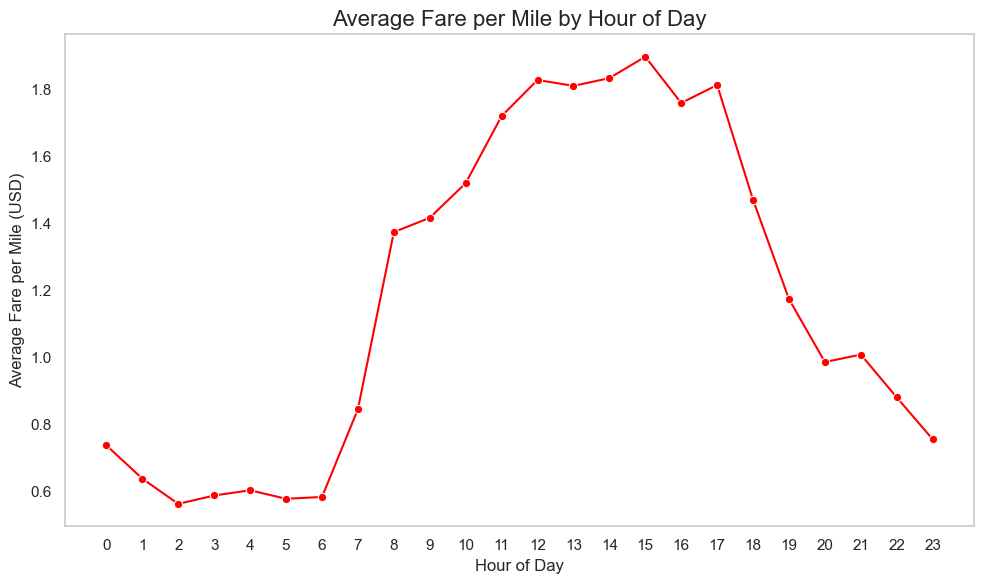

In [72]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the average fare per mile by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_fare_per_mile_by_hour, x='hour', y='fare_per_mile', marker='o', color='red')
plt.title('Average Fare per Mile by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(False)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

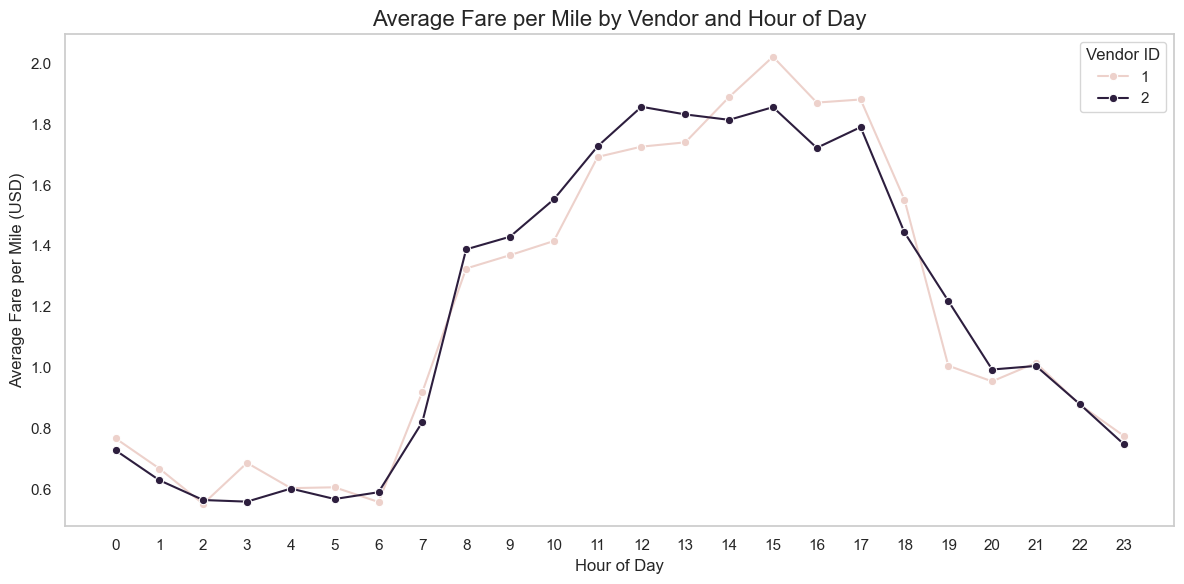

In [73]:
# Compare fare per mile for different vendors

# Group by VendorID and hour and calculate the average fare per mile
avg_fare_per_mile_vendor_hour = df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))

# Use seaborn lineplot to visualize the trends for each vendor
sns.lineplot(data=avg_fare_per_mile_vendor_hour, x='hour', y='fare_per_mile', hue='VendorID', marker='o')

plt.title('Average Fare per Mile by Vendor and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.grid(False)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [74]:
# Defining distance tiers

condition = [
    (df['trip_distance'] <= 2),
    (df['trip_distance'] > 2) & (df['trip_distance'] <= 5),
    (df['trip_distance'] > 5)
]

# Define the corresponding distance tier labels
distance_tiers = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column 'distance_tier' based on the conditions
df['distance_tier'] = np.select(condition, distance_tiers, default='Other')

df['distance_tier']

0              2 to 5 miles
5              2 to 5 miles
7             Up to 2 miles
8              2 to 5 miles
11            Up to 2 miles
                ...        
383646        Up to 2 miles
383652        Up to 2 miles
383655    More than 5 miles
383657        Up to 2 miles
383658    More than 5 miles
Name: distance_tier, Length: 155313, dtype: object

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [75]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate Tip Percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Define trip distance categories for analysis (e.g., up to 2 miles, 2-5 miles, 5+ miles)
conditions = [
    (df['trip_distance'] <= 2),
    (df['trip_distance'] > 2) & (df['trip_distance'] <= 5),
    (df['trip_distance'] > 5)
]

# Define the corresponding distance category labels
distance_categories = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column 'distance_category'
df['distance_category'] = np.select(conditions, distance_categories, default='Other')

# Extract hour from pickup datetime for analyzing tip percentages by time of pickup
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by distance categories and calculate the average tip percentage
avg_tip_percentage_by_distance = df.groupby('distance_category')['tip_percentage'].mean().reset_index()

# Group by passenger count and calculate the average tip percentage
avg_tip_percentage_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group by pickup hour and calculate the average tip percentage
avg_tip_percentage_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


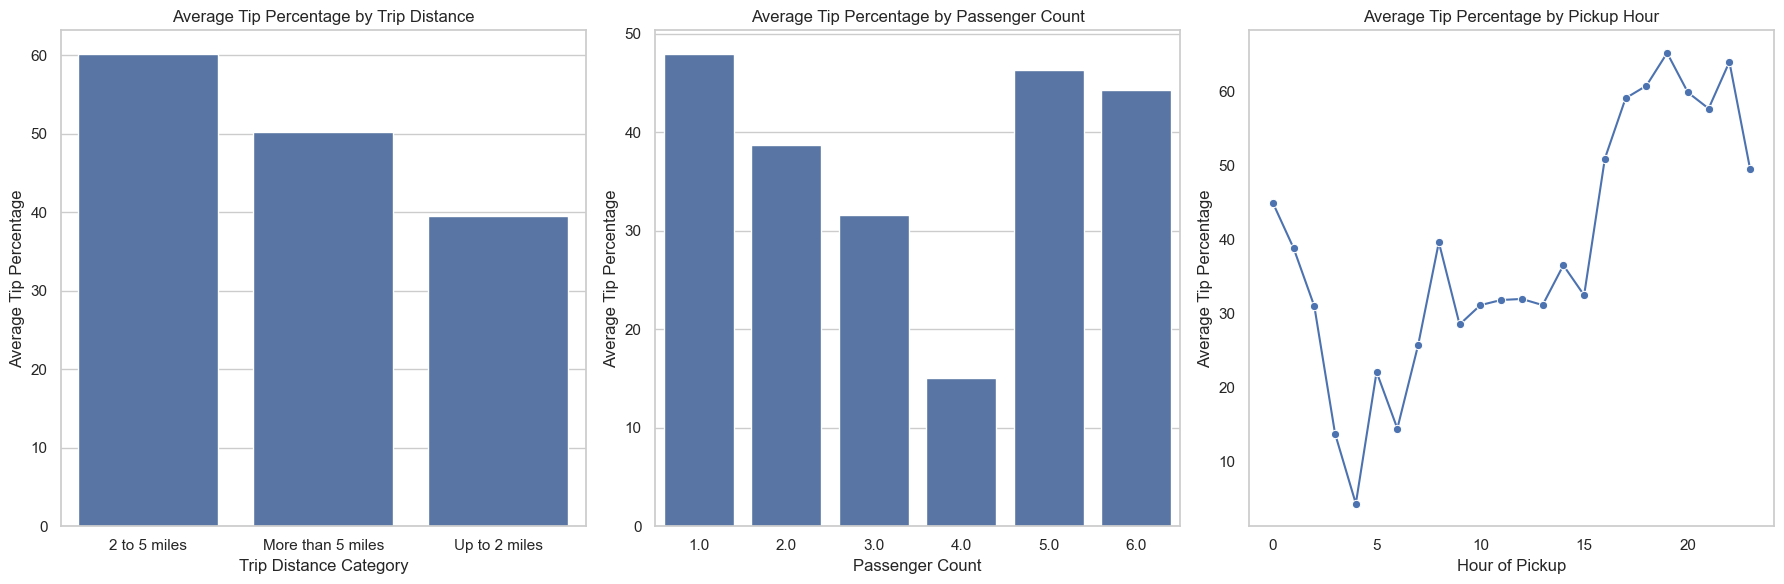

In [76]:
# Plotting the results

# Create subplots for distance, passenger count, and hour
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distance Category vs Tip Percentage
sns.barplot(data=avg_tip_percentage_by_distance, x='distance_category', y='tip_percentage', ax=axes[0])
axes[0].set_title('Average Tip Percentage by Trip Distance')
axes[0].set_xlabel('Trip Distance Category')
axes[0].set_ylabel('Average Tip Percentage')
plt.grid(False)

# Passenger Count vs Tip Percentage
sns.barplot(data=avg_tip_percentage_by_passenger_count, x='passenger_count', y='tip_percentage', ax=axes[1])
axes[1].set_title('Average Tip Percentage by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Tip Percentage')
plt.grid(False)

# Hour of Day vs Tip Percentage
sns.lineplot(data=avg_tip_percentage_by_hour, x='pickup_hour', y='tip_percentage', ax=axes[2], marker='o')
axes[2].set_title('Average Tip Percentage by Pickup Hour')
axes[2].set_xlabel('Hour of Pickup')
axes[2].set_ylabel('Average Tip Percentage')
plt.grid(False)

# Adjust layout
plt.grid(False)
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [77]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Analyze differences in trip distance, passenger count, and fare amount
low_tip_summary = low_tip_trips[['trip_distance', 'passenger_count', 'fare_amount', 'tip_percentage']]
high_tip_summary = high_tip_trips[['trip_distance', 'passenger_count', 'fare_amount', 'tip_percentage']]

# Get average values for each group
low_tip_avg = low_tip_summary.mean()
high_tip_avg = high_tip_summary.mean()

# Print the averages for both low and high tip groups
print("Low Tip (tip percentage < 10%) - Averages:")
print(low_tip_avg)

print("\nHigh Tip (tip percentage > 25%) - Averages:")
print(high_tip_avg)

Low Tip (tip percentage < 10%) - Averages:
trip_distance        1.887822
passenger_count      1.450202
fare_amount          1.348476
tip_percentage    -174.569653
dtype: object

High Tip (tip percentage > 25%) - Averages:
trip_distance        2.110932
passenger_count      1.402298
fare_amount          1.483787
tip_percentage     153.114534
dtype: object


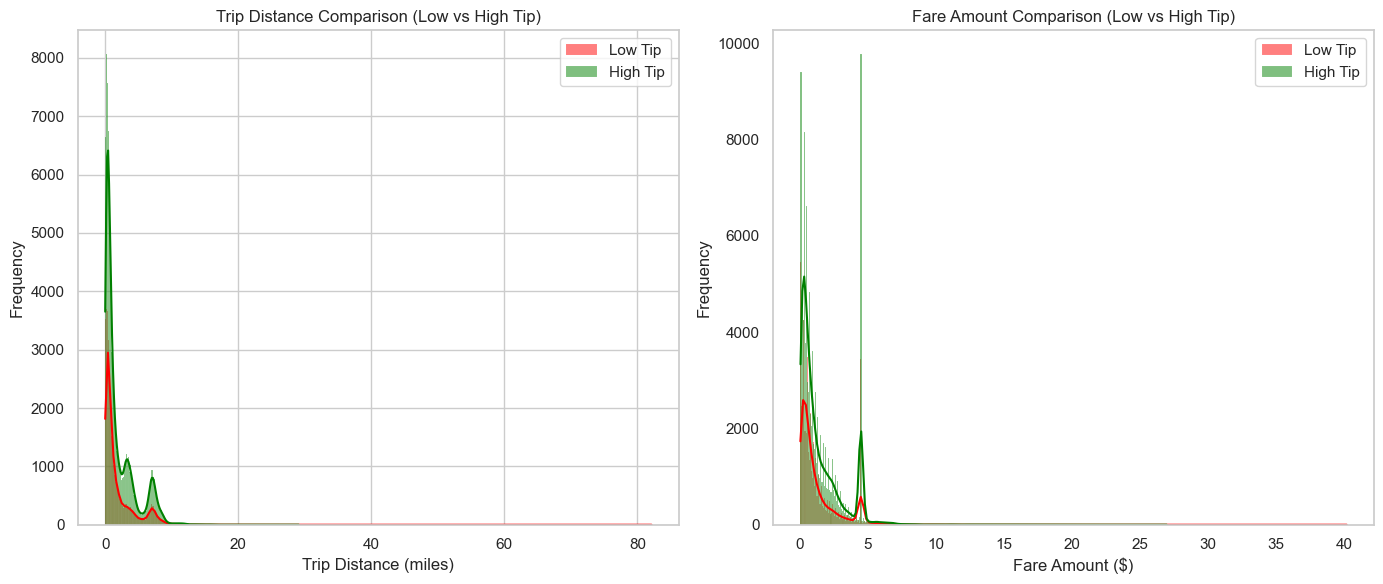

In [78]:
# Create subplots to compare low tips and high tips
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Low Tip Trip Distance, Passenger Count, and Fare Amount
sns.histplot(low_tip_trips['trip_distance'], kde=True, ax=axes[0], color='red', label='Low Tip')
sns.histplot(high_tip_trips['trip_distance'], kde=True, ax=axes[0], color='green', label='High Tip')
axes[0].set_title('Trip Distance Comparison (Low vs High Tip)')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
plt.grid(False)

# High Tip Trip Distance, Passenger Count, and Fare Amount
sns.histplot(low_tip_trips['fare_amount'], kde=True, ax=axes[1], color='red', label='Low Tip')
sns.histplot(high_tip_trips['fare_amount'], kde=True, ax=axes[1], color='green', label='High Tip')
axes[1].set_title('Fare Amount Comparison (Low vs High Tip)')
axes[1].set_xlabel('Fare Amount ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
# Create a figure with subplots for trip distance and fare amount comparisons

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Trip Distance
sns.boxplot(
    x='tip_percentage',
    y='trip_distance',
    data=df[df['tip_percentage'].notna()],
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Trip Distance Comparison (Low vs High Tip)')
axes[0].set_xlabel('Tip Percentage')
axes[0].set_ylabel('Trip Distance (miles)')
axes[0].grid(False)

# Boxplot for Fare Amount
sns.boxplot(
    x='tip_percentage',
    y='fare_amount',
    data=df[df['tip_percentage'].notna()],
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Fare Amount Comparison (Low vs High Tip)')
axes[1].set_xlabel('Tip Percentage')
axes[1].set_ylabel('Fare Amount ($)')
axes[1].grid(False)

plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [89]:
# See how passenger count varies across hours and days

# Group by hour and day_of_week, then calculate average passenger count
passenger_trend = df.groupby(['day_of_week', 'hour'])['passenger_count'].mean().reset_index()
print(passenger_trend)

     day_of_week  hour passenger_count
0              0     0         1.32243
1              0     1        1.489474
2              0     2        1.442308
3              0     3         1.52381
4              0     4        1.408451
..           ...   ...             ...
163            6    19        1.466728
164            6    20        1.459433
165            6    21        1.445186
166            6    22        1.452116
167            6    23         1.44793

[168 rows x 3 columns]


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [90]:
# How does passenger count vary across zones

# Group by PULocationID, calculate average passenger count, and map zone names
pickup_passenger_counts = (
    df.groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'})
)

# Ensure unique LocationID in zones before merge
zones_unique = zones.drop_duplicates(subset='LocationID')

# Merge zone names
pickup_passenger_counts = pickup_passenger_counts.merge(zones_unique[['LocationID', 'zone']], on='LocationID', how='left')


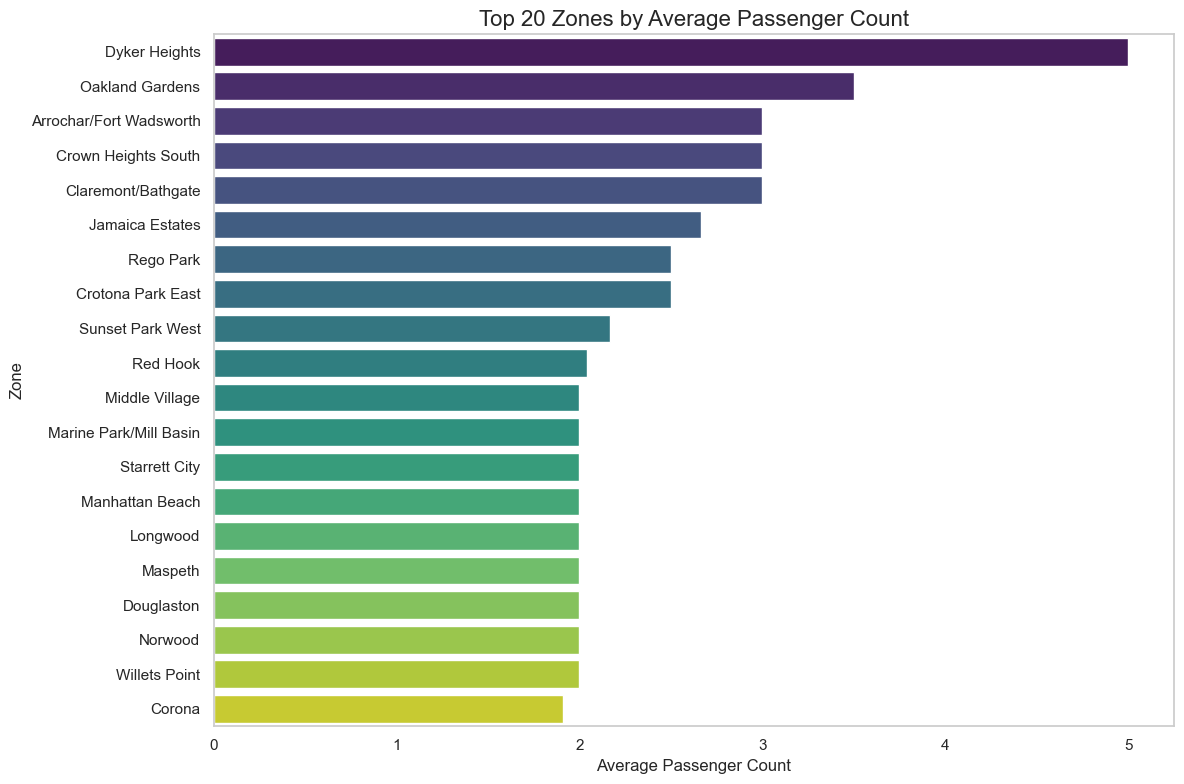

In [81]:
# Sort zones by average passenger count
top_zones_passenger = pickup_passenger_counts.sort_values(by='avg_passenger_count', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_zones_passenger, x='avg_passenger_count', y='zone', palette='viridis')

plt.title('Top 20 Zones by Average Passenger Count', fontsize=16)
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()


In [82]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by PULocationID to calculate average passenger count
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Make sure 'zones' DataFrame has 'LocationID' column
# If not already a GeoDataFrame or loaded, you can do something like:
# zones = gpd.read_file('taxi_zones.geojson')  # or however you load it

# Merge zones with average passenger count
zones_with_trips = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill missing values with 0 (for zones that had no trips)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)


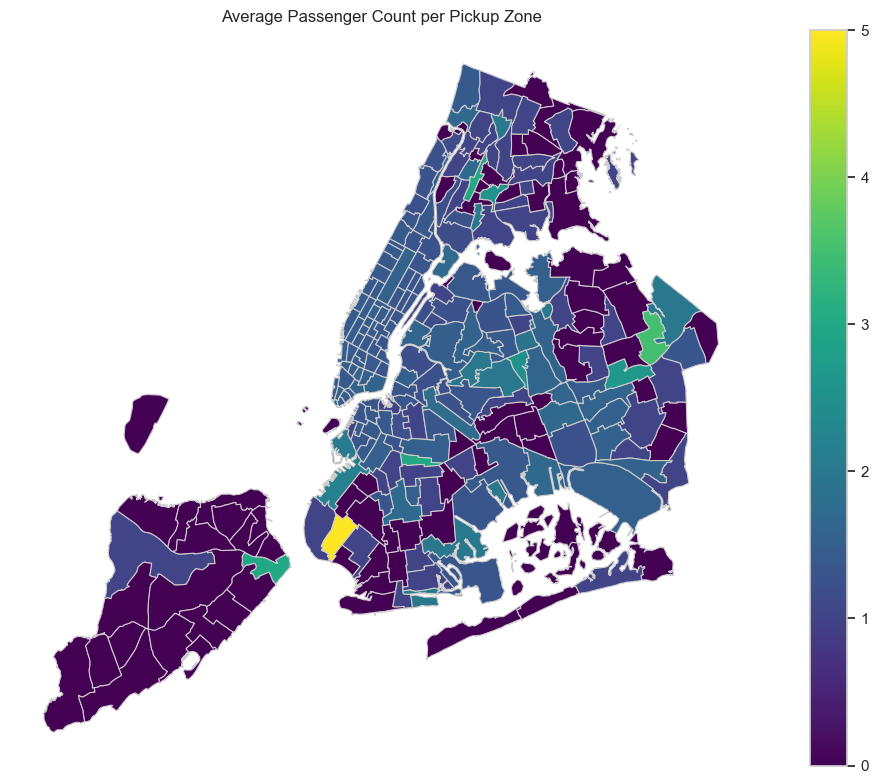

In [83]:
# Plot the average passenger count per zone
fig, ax = plt.subplots(figsize=(12, 8))
zones_with_trips.plot(column='avg_passenger_count',
                      cmap='viridis',
                      linewidth=0.8,
                      edgecolor='0.8',
                      legend=True,
                      ax=ax)

plt.title('Average Passenger Count per Pickup Zone')
plt.axis('off')
plt.grid(False)
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [94]:
# How often is each surcharge applied?

# 1. Frequency of surcharges applied (percentage of trips with non-zero values)
surcharge_stats = {
    'extra': (df['extra'] > 0).mean(),
    'congestion_surcharge': (df['congestion_surcharge'] > 0).mean(),
    'airport_fee': (df['airport_fee'] > 0).mean()
}
surcharge_freq_df = pd.DataFrame.from_dict(surcharge_stats, orient='index', columns=['Applied_Frequency'])
surcharge_freq_df['Applied_Frequency'] *= 100  # Convert to percentage

# 2. Time-based: Group by hour of day
time_surcharge = df.groupby('hour')[['extra', 'congestion_surcharge', 'airport_fee']].mean().reset_index()

# 3. Zone-based: Group by pickup zone and calculate average surcharges
zone_surcharge = df.groupby('PULocationID')[['extra', 'congestion_surcharge', 'airport_fee']].mean().reset_index()
zone_surcharge = zone_surcharge.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')


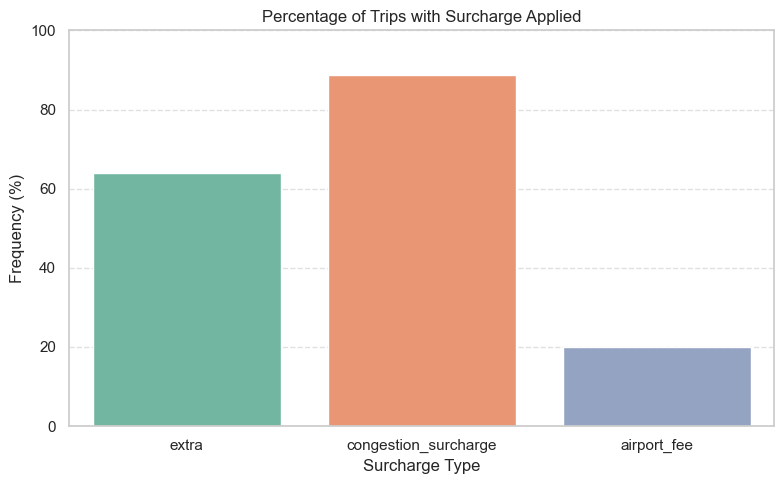

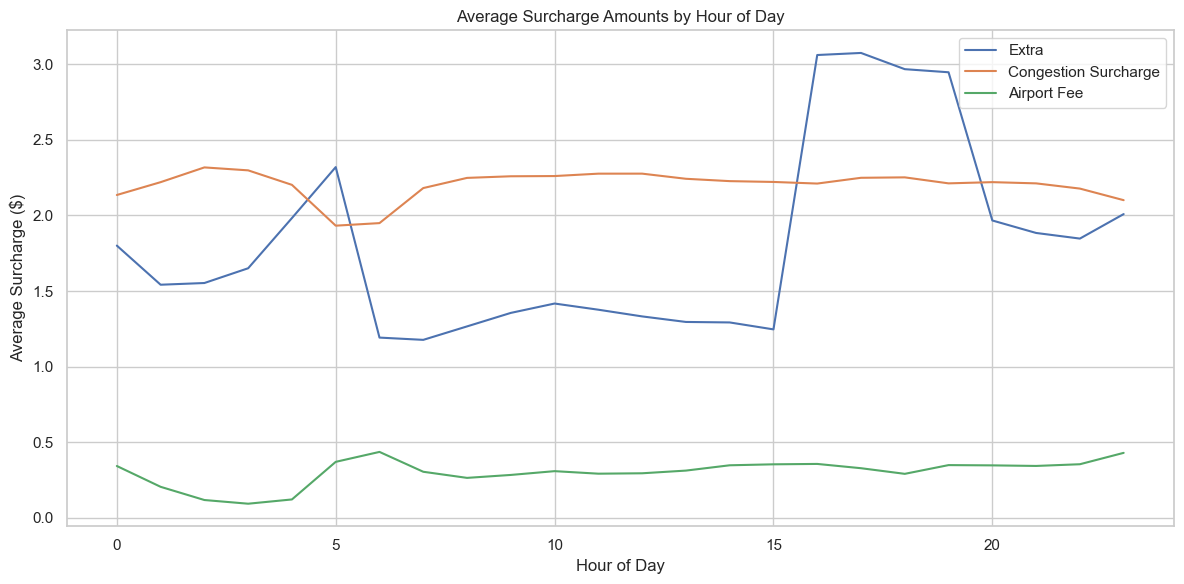

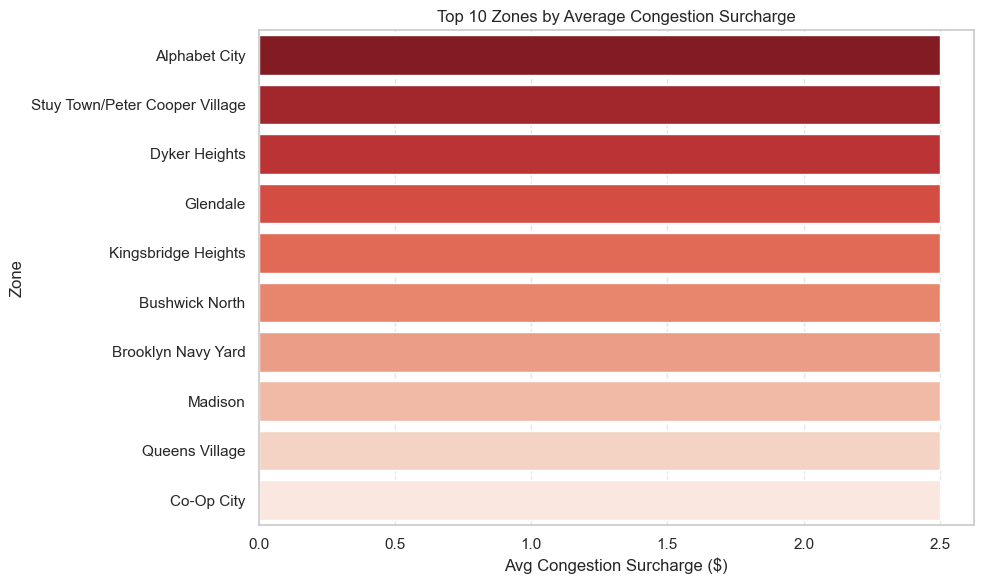

In [95]:
# 1. Bar chart for how often surcharges are applied
plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_freq_df.index, y='Applied_Frequency', data=surcharge_freq_df, palette='Set2')
plt.title('Percentage of Trips with Surcharge Applied')
plt.ylabel('Frequency (%)')
plt.xlabel('Surcharge Type')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Line chart of surcharge amounts by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_surcharge, x='hour', y='extra', label='Extra')
sns.lineplot(data=time_surcharge, x='hour', y='congestion_surcharge', label='Congestion Surcharge')
sns.lineplot(data=time_surcharge, x='hour', y='airport_fee', label='Airport Fee')
plt.title('Average Surcharge Amounts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Surcharge ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Optional: Top 10 zones by average congestion surcharge
top_zones = zone_surcharge.sort_values('congestion_surcharge', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='congestion_surcharge', y='zone', palette='Reds_r')
plt.title('Top 10 Zones by Average Congestion Surcharge')
plt.xlabel('Avg Congestion Surcharge ($)')
plt.ylabel('Zone')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [101]:

*****Ans : -> 


Smart Scheduling -> Put more taxis on the road during busy times: weekday mornings (7-10AM), evenings (4-8PM), and weekend nights
Reduce taxis during slow periods to save money

Better Route Planning -> Use traffic updates to help drivers avoid busy areas like Times Square
Position drivers where rides will be needed before demand increases

Strategic Coverage -> Focus on busy pickup spots like Midtown and airports
Add more taxis in growing areas like Brooklyn during evenings

Data Cleanup -> Create better checks for unusual fares and trip distances
Look closely at areas with strange patterns to fix problems

Tailored Services -> Offer shared rides during office hours when many people travel similar routes
Provide premium options for late-night downtown customersReduce taxis during slow periods to save money

Better Route Planning -> Use traffic updates to help drivers avoid busy areas like Times Square
Position drivers where rides will be needed before demand increases

Strategic Coverage -> Focus on busy pickup spots like Midtown and airports
Add more taxis in growing areas like Brooklyn during evenings

Data Cleanup -> Create better checks for unusual fares and trip distances
Look closely at areas with strange patterns to fix problems

Tailored Services -> Offer shared rides during office hours when many people travel similar routes
Provide premium options for late-night downtown customers  *****

SyntaxError: invalid decimal literal (125453750.py, line 4)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [96]:
Ans ->

Taxi Positioning Strategy Made Simple
Best Places for Taxis

Midtown Manhattan

When: Weekday mornings (7-10AM) and evenings (4-8PM), especially Tuesday-Thursday
Why: Office workers, tourists, regular commuters
Do: Have extra taxis ready during office rush hours

Airports (JFK, LGA)

When: Every day, especially 5-11PM on weekends and holidays
Why: Travelers with luggage need taxis
Do: Match taxi availability with flight arrivals


Downtown and Financial District

When: Weekday mornings (7-9AM) and evenings (5-7PM)
Why: Business people taking short to medium trips
Do: Focus on start and end of business hours


Brooklyn and Queens

When: Evenings and weekends
Why: People going home or out for fun
Do: Move taxis from Manhattan to these areas at night and on weekends


Outer Boroughs (Bronx, Staten Island)

When: Early mornings and weekends
Why: Fewer transportation options
Do: Offer special booking options during quieter times



Time Tips

Weekdays: Focus on business areas and commuter routes
Weekends: Cover entertainment spots, airports, and neighborhoods

Seasonal Changes -> Add more taxis in tourist areas from May-September and during holiday shopping seasons


SyntaxError: invalid decimal literal (1488510410.py, line 6)

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [99]:
 ####  Simple Pricing Strategy
1. Match Prices to Different Customer Types

Work Travelers: These people care more about being on time than saving a few dollars. Offer reliable service during weekday commute hours.
Weekend Fun-Seekers: These customers watch their spending more closely. Give them group discount options.
Tourists: These riders want simple pricing and safe service from airports and landmarks. Offer clear flat rates.

2. Reward Regular Riders

Offer monthly ride passes for frequent customers
Give discounts or cashback to people who use the service often

3. Smarter Price Adjustments

Use traffic, weather, and other data to spot when rides will be difficult
Add small price increases ($1-3) only when necessary, not just because it's busy

4. Simple Flat Rates Between Popular Places

Set fixed prices for common routes like airport trips
Customers prefer knowing the exact fare before riding

5. Stay Competitive Without Losing Money

Keep track of what Uber, Lyft and others are charging
Price just below competitors when possible, but not so low that you lose money

This approach keeps prices fair while still making profit, keeps customers coming back, 
and stays competitive without relying on surprise price increases.

SyntaxError: unterminated string literal (detected at line 16) (720153805.py, line 16)